# Language Detection

### Import Statements 

In [1]:
import os

import iso639 
import langid
import fasttext
import langdetect
import fasttext.util
from fasttext.FastText import _FastText


from iso639 import *
from langdetect import *
from keras.utils import *
from sklearn.metrics import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *


import nbformat
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sentence_transformers import SentenceTransformer

le = LabelEncoder()
os.environ["TOKENIZERS_PARALLELISM"] = "false"

2023-05-03 22:07:55.622043: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-03 22:07:55.623487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 22:07:55.657203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 22:07:55.657826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 22:07:56.236342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Useful Functions

- Text Cleaning

In [2]:
def clean(Text):
    """
    Clean text by removing newlines, tabs, and double spaces.

    Args:
        text (str or pandas.Series): Text data to clean. If a pandas Series is passed, 
            the cleaning is applied element-wise.

    Returns:
        str or pandas.Series: Cleaned text.

    """
    Text = Text.apply(lambda x: x.replace("\n", " "))
    Text = Text.apply(lambda x: x.replace("\t", " "))
    Text = Text.apply(lambda x: x.replace("  ", " "))
    return Text

- ISO Language Code to Language Name

In [3]:
def iso2str(text):
    '''
    Convert ISO language code to language name in string format.
    
    Args:
        text (str): ISO language code

    Returns:
        str: Language name in string format, or 'unknown' if the code is invalid.
    '''
    try:
        return languages.get(alpha2=text).name
    except:
        return 'unknown'

- LangDetect Prediction

In [4]:
def check_lang(text):
    '''Detects the language of the input text using Langdetect.
    
    Args:
        param text (str) : Input text
    Returns:
        str : Two-letter language code if language is detected, otherwise returns "unknown".
    '''
    try:
        lang = detect(str(text))
    except lang_detect_exception.LangDetectException:
        lang = 'unknown'
    return lang   

- FastText Prediction 

In [5]:
class LanguageIdentification:
    """
    A class for identifying the language of a given input text using a pre-trained fasttext language model.

    Attributes:
        model (fasttext.FastText._FastText): The pre-trained fasttext language model.

    Methods:
        predict_lang(text: str) -> str:
            Identifies the language of the given input text using the pre-trained fasttext language model.
    """

    def __init__(self):
        """
        Initializes the LanguageIdentification class by loading the pre-trained fasttext language model.
        """
        pretrained_lang_model = "../models/lid.bin"
        self.model = fasttext.load_model(pretrained_lang_model)

    def predict_lang(self, text: str) -> str:
        """
        Identifies the language of the given input text using the pre-trained fasttext language model.

        Args:
            text (str): The input text whose language is to be identified.

        Returns:
            str: The identified language of the input text.
        """
        predictions = self.model.predict(text, k=1) 
        predictions = predictions[0][0].replace("__label__", "")
        return predictions


- Custom Evaluation Report

In [6]:
def multiclass_report(y_true, y_pred, labels):
    '''
    Calculates and displays the accuracy, precision, and recall for the classification of a multiclass problem.

    Args:
        y_true (array-like): True labels for the data.
        y_pred (array-like): Predicted labels for the data.
        labels (list-like): List of unique class labels in the data.

    Returns:
        None

    Prints the accuracy, precision, and recall for the classification.
    Displays a confusion matrix as a heatmap.
    '''
    
    print(f'Accuracy: {np.mean(y_true == y_pred)}\nPrecision: {np.mean(y_true == y_pred)}\nRecall: {np.mean(y_true == y_pred)}')
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

- Embedding using SentenceTransformer 

In [7]:
st = SentenceTransformer('all-MiniLM-L6-v2')

def stEmbedding(text, model = 'model'):
    '''
    Embed the given text using Sentence Transformer.

    Args:
    - text (str): The text to embed.

    Returns:
    numpy.ndarray: The embedding of the input text as a numpy array.

    Raises:
    ValueError: If an unsupported model is specified.
    '''
    return st.encode(text)


/home/arrry/anaconda3/envs/Language/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


- Embedding using FastText

In [8]:
ft = _FastText('../models/lid.bin')
def ftEmbedding(text):
    '''
    Embed the given text using a Fasttext.

    Args:
    - text (str): The text to embed.

    Returns:
    numpy.ndarray: The embedding of the input text as a numpy array.

    Raises:
    ValueError: If an unsupported model is specified.
    '''

    return ft.get_sentence_vector(text)

- T-Stocastic Neighbour Embedding Plot

In [9]:
def Tsen(Embedding, Language, Dimentions):
    '''
    Visualize word embeddings using t-SNE algorithm.

    Args:
        Embedding (pd.DataFrame): DataFrame containing word embeddings.
        Language (pd.Series): Series containing language labels for each word.
        Dimentions (int): Number of dimensions in the output embedding space.

    Returns:
        None

    Displays a scatter plot of the word embeddings in the reduced dimensional space.
    '''
    X = np.array(Embedding.tolist())
    y = Language.values
    X_embedded = TSNE(n_components=Dimentions).fit_transform(X)

    plt.figure(figsize=(10, 10))
    for i, lang in enumerate(Language.unique()):
        plt.scatter(X_embedded[y == lang, 0], X_embedded[y == lang, 1], label=lang)

    plt.legend()
    plt.show()

- Interactive Plot using Plotly 

In [10]:
def Plotly(Embedding, Language, Dimentions):
    '''
    Visualize word embeddings using t-SNE algorithm and Plotly library.

    Args:
        Embedding (pd.DataFrame): DataFrame containing word embeddings.
        Language (pd.Series): Series containing language labels for each word.
        Dimentions (int): Number of dimensions in the output embedding space.

    Returns:
        None

    Displays an interactive scatter plot of the word embeddings in the reduced dimensional space.
    '''
    
    X = np.array(Embedding.tolist())
    y = Language.values

    X_embedded = TSNE(n_components=Dimentions).fit_transform(X)
    fig = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=y, width=800, height=800)
    fig.show()

- Data Splitting Function 

In [11]:

def split_train_test_data(Embedding, Language):
    '''
    Splits the data into training and testing sets, and applies label encoding to the target variable.

    Args:
    - Embedding (DataFrame): DataFrame containing the embedding vectors.
    - Language (DataFrame): DataFrame containing the target variable.

    Returns:
    - X_train, X_test, y_train, y_test (numpy.ndarray): The training and testing data and target variables.
    '''
    
    X = np.array(Embedding.tolist())

    y = Language.values
    y = LabelEncoder().fit_transform(y)
    y = to_categorical(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

- All in One Wrapper for creating Custom model _(OLD)_ 

In [12]:
def createModel(model_type, num_layers, layer_types, layer_units, input_shape):
    '''Create a deep learning model with specified architecture.

    Args:
        model_type (str): The type of model to create. Supported values are
            'Sequentials', 'LSTM', and 'Convolutional'.
        num_layers (int): The number of layers to include in the model.
        layer_types (list[str]): A list of layer types to include in the model.
        layer_units (list[int]): A list of the number of units for each layer in the model.
        input_shape (tuple[int]): The shape of the input data.
        output_units (int): The number of output units in the final layer of the model.

    Returns:
        tensorflow.keras.models.Model: The compiled deep learning model.

    Raises:
        ValueError: If an unsupported model type is specified.
    '''

    model = Sequential()
    if model_type == 'Sequentials':
        for i in range(num_layers):
            if layer_types[i] == 'Dense':
                model.add(Dense(layer_units[i], activation='relu'))
            elif layer_types[i] == 'Dropout':
                model.add(Dropout(layer_units[i]))
            else:
                raise ValueError(f"Unsupported layer type: {layer_types[i]}")
    
    elif model_type == 'LSTM':
        model.add(Reshape((input_shape[1], 1)))
        for i in range(num_layers):
            if layer_types[i] == 'LSTM':
                model.add(LSTM(layer_units[i], input_shape=input_shape))
            elif layer_types[i] == 'Dense':
                model.add(Dense(layer_units[i], activation='relu'))
            elif layer_types[i] == 'Dropout':
                model.add(Dropout(layer_units[i]))
            else:
                raise ValueError(f"Unsupported layer type: {layer_types[i]}")

    elif model_type == 'Convolutional1D':
        model.add(Reshape((input_shape[1], 1)))
        for i in range(num_layers):
            if layer_types[i] == 'Conv1D':
                model.add(Conv1D(filters=layer_units[i], kernel_size=3, activation='relu', input_shape=input_shape))
            elif layer_types[i] == 'MaxPooling1D':
                model.add(MaxPooling1D(pool_size=2))
            elif layer_types[i] == 'Conv2D':
                model.add(Conv2D(filters=layer_units[i], kernel_size=3, activation='relu', input_shape=input_shape))
            elif layer_types[i] == 'MaxPooling2D':
                model.add(MaxPooling2D(pool_size=2))
            elif layer_types[i] == 'Flatten':
                model.add(Flatten())
            elif layer_types[i] == 'Dense':
                model.add(Dense(layer_units[i], activation='relu'))
            elif layer_types[i] == 'Dropout':
                model.add(Dropout(layer_units[i]))
            else:
                raise ValueError(f"Unsupported layer type: {layer_types[i]}")

    elif model_type == 'Convolutional2D':
        model.add(Reshape((input_shape[1], 1)))
        for i in range(num_layers):
            if layer_types[i] == 'Conv2D':
                model.add(Conv1D(filters=layer_units[i], kernel_size=3, activation='relu', input_shape=input_shape))
            elif layer_types[i] == 'MaxPooling2D':
                model.add(MaxPooling1D(pool_size=2))
            elif layer_types[i] == 'Flatten':
                model.add(Flatten())
            elif layer_types[i] == 'Dense':
                model.add(Dense(layer_units[i], activation='relu'))
            elif layer_types[i] == 'Dropout':
                model.add(Dropout(layer_units[i]))
            else:
                raise ValueError(f"Unsupported layer type: {layer_types[i]}")
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
    model.build(input_shape=input_shape)
    model.summary()
    return model


- Multi-layer Perceptron (MLP) Wrapper 

In [13]:
def sequentialModel(numLayers, layerTypes, layerUnits, inputLayer, outputLayer):
    '''Create a deep learning model with Sequenctial architecture.

    Args:
        numLayers (int): The number of layers to include in the model.
        layerTypes (list[str]): A list of layer types to include in the model.
        layerUnits (list[int]): A list of the number of units for each layer in the model.
        inputLayer (tuple[int]): The shape of the input data.
        outputLayer (int): The number of output units in the final layer of the model.

    Returns:
        tensorflow.keras.models.Model: The compiled deep learning model.

    Raises:
        ValueError: If an unsupported layer type is specified.
    '''
    model = Sequential()
    for i in range(numLayers):
        if layerTypes[i] == 'Dense':
            model.add(Dense(layerUnits[i], activation='relu'))
        elif layerTypes[i] == 'Dropout':
            model.add(Dropout(layerUnits[i]))
        else:
            raise ValueError(f"Unsupported layer type: {layerTypes[i]}")
    model.add(Dense(outputLayer, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


- LSTM Wrapper 

In [14]:
def LSTMModel(numLayers, layerTypes, layerUnits, inputLayer, outputLayer):
    '''Create a deep learning model with LSTM architecture.

    Args:
        numLayers (int): The number of layers to include in the model.
        layerTypes (list[str]): A list of layer types to include in the model.
        layerUnits (list[int]): A list of the number of units for each layer in the model.
        inputLayer (tuple[int]): The shape of the input data.
        outputLayer (int): The number of output units in the final layer of the model.

    Returns:
        tensorflow.keras.models.Model: The compiled deep learning model.

    Raises:
        ValueError: If an unsupported layer type is specified.
    '''
    model = Sequential()
    for i in range(numLayers):
        if layer_types[i] == 'LSTM':
            model.add(LSTM(layer_units[i], input_shape=inputLayer, return_sequences=True))
        elif layer_types[i] == 'Dense':
            model.add(Dense(layer_units[i], activation='relu'))
        elif layer_types[i] == 'Dropout':
            model.add(Dropout(layer_units[i]))
        else:
            raise ValueError(f"Unsupported layer type: {layerTypes[i]}")
    model.add(Dense(outputLayer, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


- Convolutional Model Wrapper 

In [15]:
def ConvoModel(numLayers, layerTypes, layerUnits, inputLayer, outputLayer):
    '''Create a deep learning model with Convolutional architecture.

    Args:
        numLayers (int): The number of layers to include in the model.
        layerTypes (list[str]): A list of layer types to include in the model.
        layerUnits (list[int]): A list of the number of units for each layer in the model.
        inputLayer (tuple[int]): The shape of the input data.
        outputLayer (int): The number of output units in the final layer of the model.

    Returns:
        tensorflow.keras.models.Model: The compiled deep learning model.

    Raises:
        ValueError: If an unsupported layer type is specified.
    '''
    model = Sequential()
    for i in range(numLayers):
        if layer_types[i] == 'Conv1D':
            model.add(Conv1D(filters=layer_units[i], kernel_size=3, activation='relu', input_shape=inputLayer))
        elif layer_types[i] == 'MaxPooling1D':
            model.add(MaxPooling1D(pool_size=2))
        elif layer_types[i] == 'Conv2D':
            model.add(Conv2D(filters=layer_units[i], kernel_size=3, activation='relu', input_shape=inputLayer))
        elif layer_types[i] == 'MaxPooling2D':
            model.add(MaxPooling2D(pool_size=2))
        elif layer_types[i] == 'Flatten':
            model.add(Flatten())
        elif layer_types[i] == 'Dense':
            model.add(Dense(layer_units[i], activation='relu'))
        elif layer_types[i] == 'Dropout':
            model.add(Dropout(layer_units[i]))
        else:
            raise ValueError(f"Unsupported layer type: {layerTypes[i]}")
    model.add(Dense(outputLayer, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

- Model Training 

In [16]:
def TrainModel(model, epochs, name, X_train, X_test, y_train, y_test):
    '''
    Train the deep learning model and evaluate its performance

    Args:
    - model : the deep learning model object
    - epochs : the number of epochs to train the model
    - name : the name of the file to save the trained model
    - X_train : the input training data
    - X_test : the input testing data
    - y_train : the target training labels
    - y_test : the target testing labels

    Returns:
    None
    '''

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    epoch(history, y_test, y_pred)
    modelEval(y_test, y_pred)

- Deeplearning Evaluation 

In [17]:
def modelEval(y_test, y_pred):
    """
    Evaluate the model performance using various metrics and plot a confusion matrix.

    Args:
        y_test (numpy array): True labels of the test data in one-hot encoding format
        y_pred (numpy array): Predicted labels of the test data in categorical format

    Returns:
        None
    """


    y_test = np.argmax(y_test, axis=1)

    xtick = df['Language'].unique()
    ytick = df['Language'].unique()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'Accuracy\t:\t{accuracy}')
    print(f'Precision\t:\t{precision}')
    print(f'Recall\t:\t{recall}')
    print(f'F1 score\t:\t{f1}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=xtick, yticklabels=ytick)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


- Training Plots

In [18]:
def epoch(history, y_test, y_pred):
    '''
    Plot accuracy and loss values during training and validation as a function of epochs.

    Args:
        history (keras.callbacks.History): Object returned by fit() containing information about the training history.

    Returns:
        None

    Displays two plots:
    1. Accuracy vs Epochs: shows the training and validation accuracy values as a function of epochs.
    2. Loss vs Epochs: shows the training and validation loss values as a function of epochs.
    '''
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs Graph')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs Graph')
    plt.legend()
    plt.show()


## Using Embeddings

### Using SentenceTransformer

In [19]:
df = pd.read_csv('../data/Language.csv')
df['Text'] = clean(df['Text'])

df['Embedding'] = df['Text'].apply(stEmbedding)


In [20]:
df.head()

Text Language   
0   Nature, in the broadest sense, is the natural...  English  \
1  "Nature" can refer to the phenomena of the phy...  English   
2  The study of nature is a large, if not the onl...  English   
3  Although humans are part of nature, human acti...  English   
4  [1] The word nature is borrowed from the Old F...  English   

                                           Embedding  
0  [0.06381069, -0.020321652, 0.022865318, 0.0803...  
1  [0.04028564, 0.013012324, 0.010959669, 0.13800...  
2  [0.073503, 0.061530456, 0.083170004, 0.0722697...  
3  [0.049719308, -0.046503387, 0.066873305, 0.047...  
4  [0.026049394, 0.031227034, 0.0108607905, 0.117...

In [21]:
X_train, X_test, y_train, y_test = split_train_test_data(df['Embedding'], df['Language'])

#### Multi-Layer Perceptron

- Model : 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                6545      
                                                                 
Total params: 6,545
Trainable params: 6,545
Non-trainable params: 0
_________________________________________________________________


2023-05-03 22:11:19.175807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-03 22:11:19.175938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: n00b
2023-05-03 22:11:19.175958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: n00b
2023-05-03 22:11:19.176237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.105.17
2023-05-03 22:11:19.176310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.105.17
2023-05-03 22:11:19.176325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 525.105.17


Epoch 1/25
259/259 [==============================] - 1s 2ms/step - loss: 2.2883 - accuracy: 0.6917 - val_loss: 1.8200 - val_accuracy: 0.8230
Epoch 2/25
259/259 [==============================] - 0s 1ms/step - loss: 1.4975 - accuracy: 0.8476 - val_loss: 1.2463 - val_accuracy: 0.8675
Epoch 3/25
259/259 [==============================] - 0s 1ms/step - loss: 1.0603 - accuracy: 0.8843 - val_loss: 0.9295 - val_accuracy: 0.8859
Epoch 4/25
259/259 [==============================] - 0s 1ms/step - loss: 0.8138 - accuracy: 0.8983 - val_loss: 0.7430 - val_accuracy: 0.8956
Epoch 5/25
259/259 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.9047 - val_loss: 0.6228 - val_accuracy: 0.9062
Epoch 6/25
259/259 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.9110 - val_loss: 0.5409 - val_accuracy: 0.9125
Epoch 7/25
259/259 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.9146 - val_loss: 0.4816 - val_accuracy: 0.9192
Epoch 

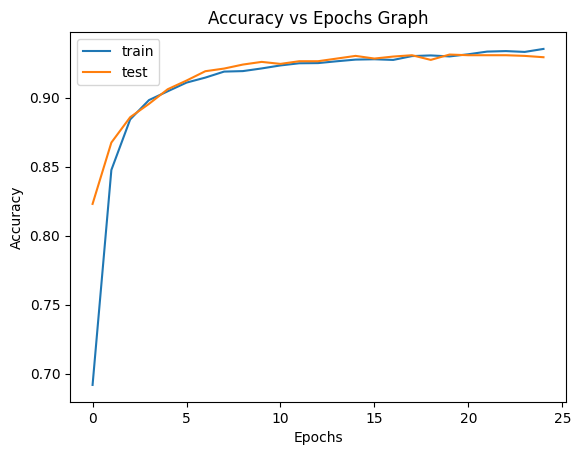

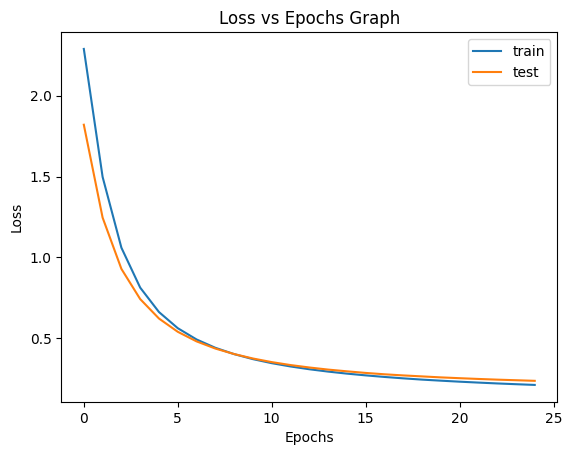

Accuracy	:	0.9294003868471954
Precision	:	0.9295668327242583
Recall	:	0.9294003868471954
F1 score	:	0.927884088694743


In [22]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=0, 
    layer_types=[], 
    layer_units=[], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_MLP1', X_train, X_test, y_train, y_test)


- Model : 2

In [23]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=1, 
    layer_types=['Dense'], 
    layer_units=[128], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_MLP2', X_train, X_test, y_train, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               49280     
                                                                 
 dense_2 (Dense)             (None, 17)                2193      
                                                                 
Total params: 51,473
Trainable params: 51,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 1s 3ms/step - loss: 1.1891 - accuracy: 0.7782 - val_loss: 0.4249 - val_accuracy: 0.9043
Epoch 2/25
259/259 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.9153 - val_loss: 0.2701 - val_accuracy: 0.9202
Epoch 3/25
259/259 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.9253 - val_loss: 0.2285 - val_accuracy: 0.9246
Epoch 4/25
259/259 [

Accuracy	:	0.9264990328820116
Precision	:	0.9290715273998632
Recall	:	0.9264990328820116
F1 score	:	0.9274624700361085


- Model : 3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               49280     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 17)                2193      
                                                                 
Total params: 51,473
Trainable params: 51,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 1s 3ms/step - loss: 1.2713 - accuracy: 0.7628 - val_loss: 0.4552 - val_accuracy: 0.8956
Epoch 2/25
259/259 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8985 - val_loss: 0.2830 - val_accuracy: 0.9188
Epoch 3/25
259/259 [==========

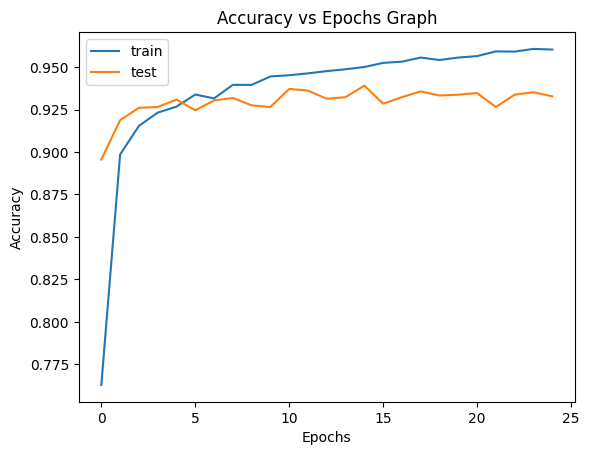

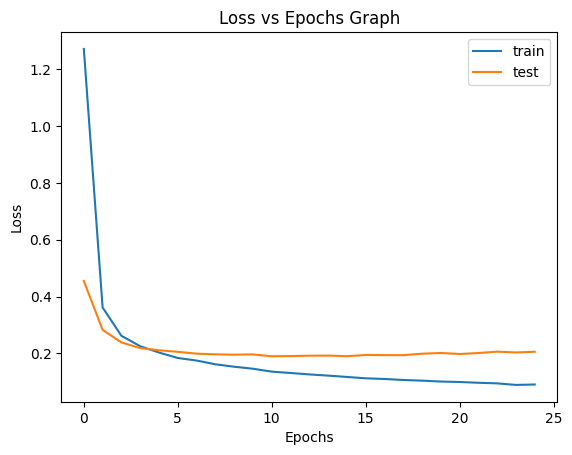

Accuracy	:	0.9327852998065764
Precision	:	0.9339852607654244
Recall	:	0.9327852998065764
F1 score	:	0.9304641629471604


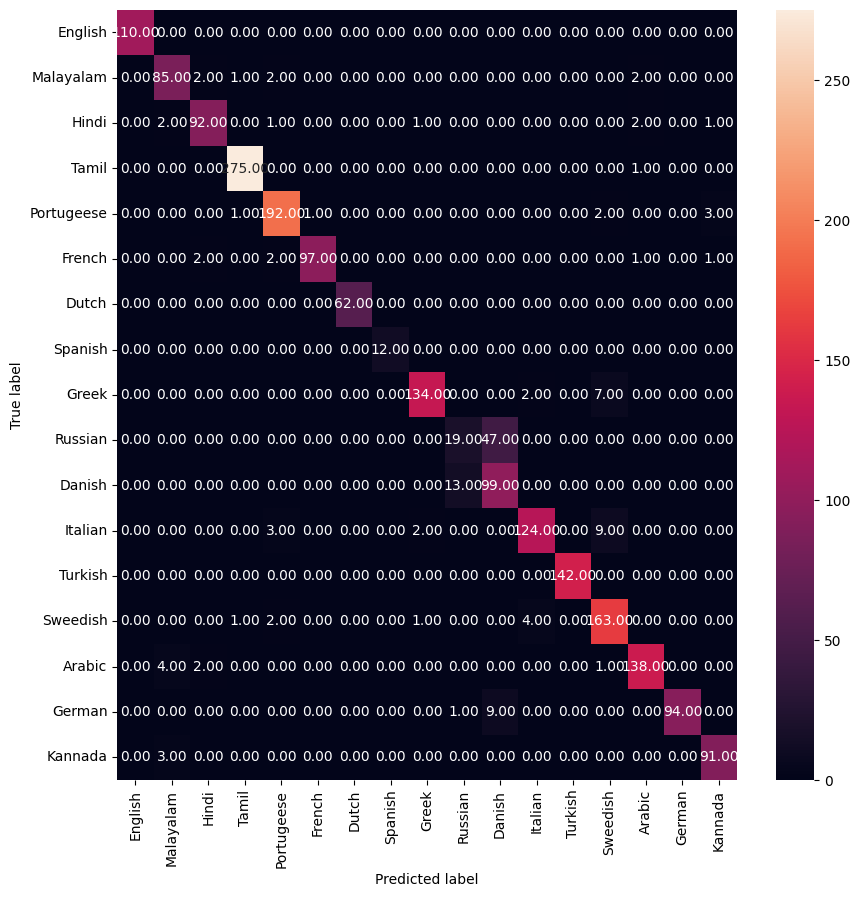

In [24]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=2, 
    layer_types=['Dense', 'Dropout'], 
    layer_units=[128, 0.2], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_MLP3', X_train, X_test, y_train, y_test)


- Model : 4

In [25]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=3, 
    layer_types=['Dense', 'Dropout', 'Dense'], 
    layer_units=[128, 0.2, 64], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_MLP4', X_train, X_test, y_train, y_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               49280     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 17)                1105      
                                                                 
Total params: 58,641
Trainable params: 58,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 1s 2ms/step - loss: 1.0596 - accuracy: 0.7402 - val_loss: 0.3220 - val_accuracy: 0.9033
Epoch 2/25
259/259 [====================

Accuracy	:	0.9342359767891683
Precision	:	0.9365094004113287
Recall	:	0.9342359767891683
F1 score	:	0.9323595342731646


- Model : 5

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               49280     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 17)                1105      
                                                                 
Total params: 58,641
Trainable params: 58,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================

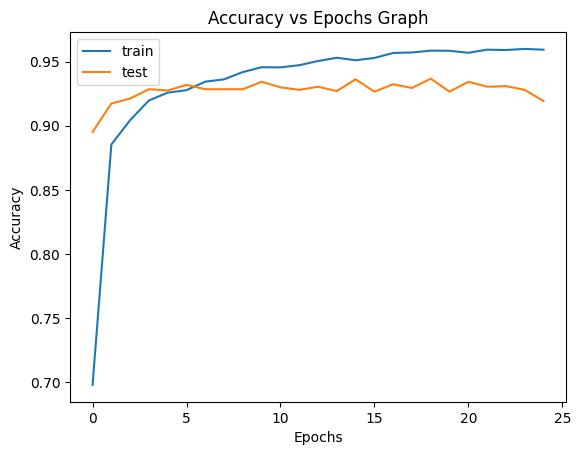

Accuracy	:	0.9192456479690522
Precision	:	0.9244379652714071
Recall	:	0.9192456479690522
F1 score	:	0.9208080809811159


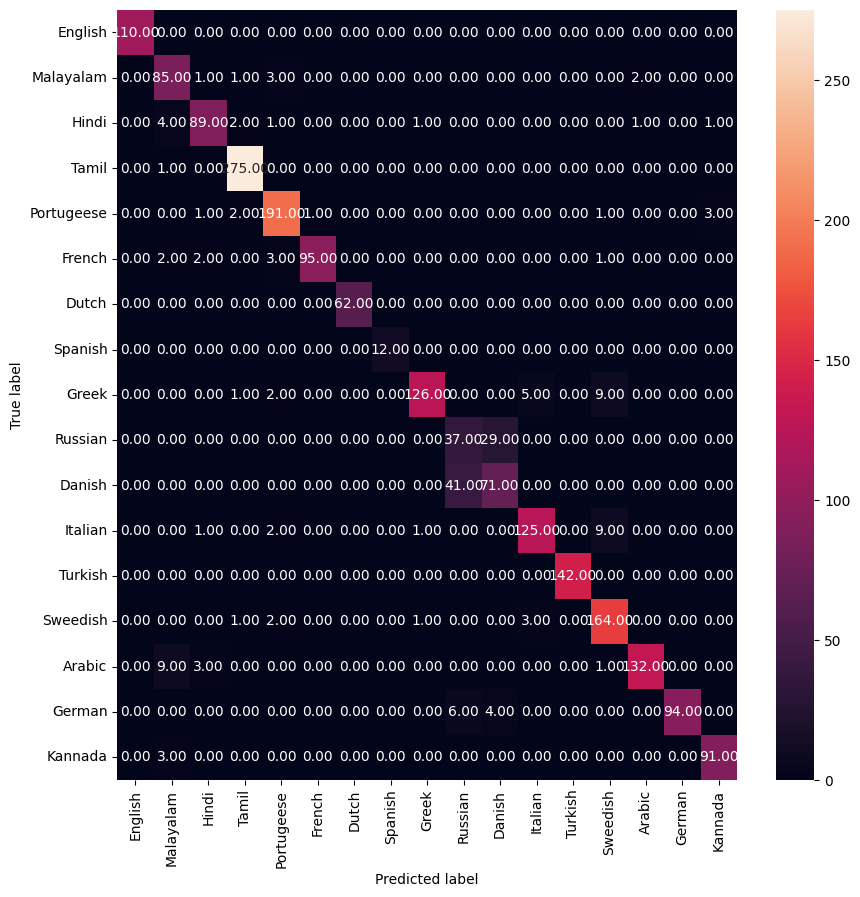

In [26]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=4, 
    layer_types=['Dense', 'Dropout', 'Dense', 'Dropout'], 
    layer_units=[128, 0.2, 64, 0.2], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_MLP5', X_train, X_test, y_train, y_test)


#### Long Short Term Memory

- Model : 1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 384, 1)            0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_11 (Dense)            (None, 17)                1105      
                                                                 
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 22:12:36.294390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:12:36.296663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:12:36.298349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 2.7344 - accuracy: 0.1327

2023-05-03 22:13:09.214043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:13:09.216219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:13:09.217735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 35s 129ms/step - loss: 2.7344 - accuracy: 0.1327 - val_loss: 2.7290 - val_accuracy: 0.1335
Epoch 2/25
259/259 [==============================] - 32s 122ms/step - loss: 2.7168 - accuracy: 0.1345 - val_loss: 2.9057 - val_accuracy: 0.1136
Epoch 3/25
259/259 [==============================] - 31s 121ms/step - loss: 2.6933 - accuracy: 0.1411 - val_loss: 2.7248 - val_accuracy: 0.1335
Epoch 4/25
259/259 [==============================] - 30s 115ms/step - loss: 2.7220 - accuracy: 0.1341 - val_loss: 2.7174 - val_accuracy: 0.1335
Epoch 5/25
259/259 [==============================] - 31s 120ms/step - loss: 2.7136 - accuracy: 0.1341 - val_loss: 2.7055 - val_accuracy: 0.1335
Epoch 6/25
259/259 [==============================] - 35s 134ms/step - loss: 2.7113 - accuracy: 0.1327 - val_loss: 2.7049 - val_accuracy: 0.1335
Epoch 7/25
259/259 [==============================] - 39s 150ms/step - loss: 2.7031 - accuracy: 0.1344 - val_loss: 2.7071 - val_accuracy: 0.1

2023-05-03 22:28:54.713998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:28:54.716562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:28:54.717863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 3s 45ms/step


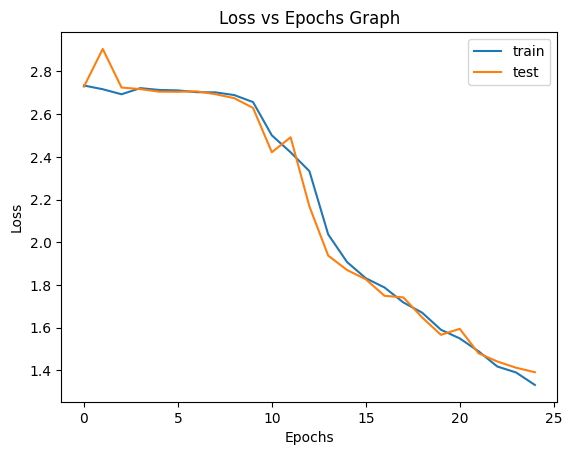

Accuracy	:	0.5352998065764023
Precision	:	0.5396439410099861
Recall	:	0.5352998065764023
F1 score	:	0.5066924718271273


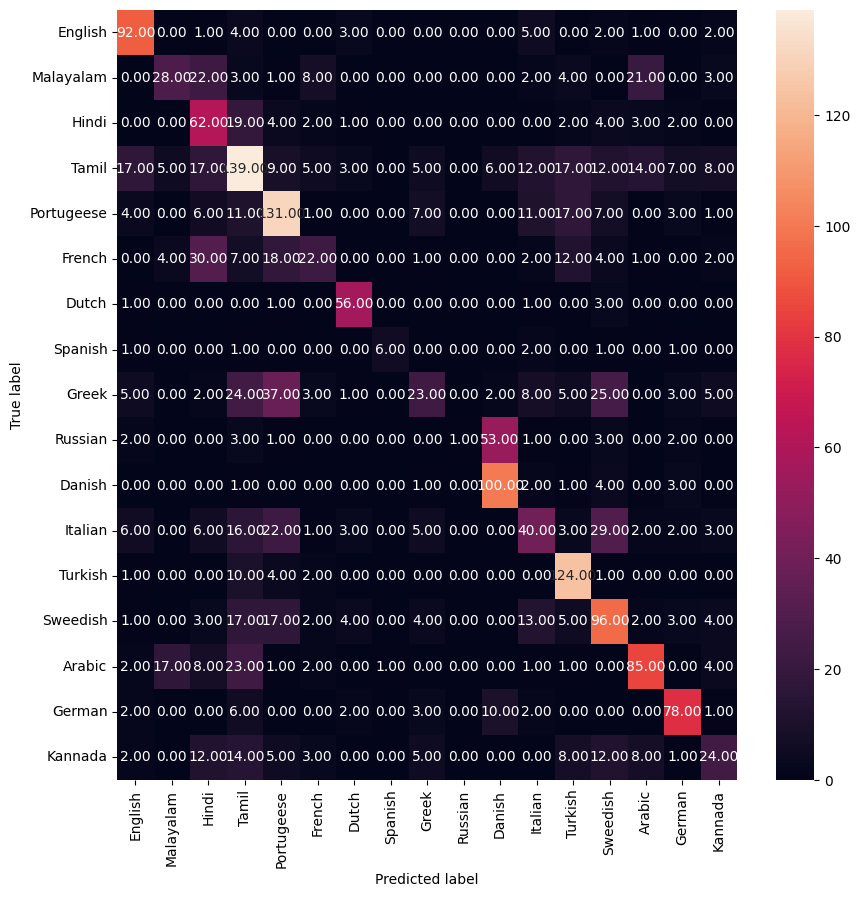

In [27]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=1, 
    layer_types=['LSTM'], 
    layer_units=[64], 
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_LSTM1', X_train, X_test, y_train, y_test)

- Model : 2

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 384, 1)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 17)                1105      
                                                                 
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 22:28:59.756846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:28:59.759535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:28:59.761089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 2.7468 - accuracy: 0.1318

2023-05-03 22:29:38.005520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:29:38.007221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:29:38.008562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 41s 150ms/step - loss: 2.7468 - accuracy: 0.1318 - val_loss: 2.7248 - val_accuracy: 0.1335
Epoch 2/25
259/259 [==============================] - 39s 152ms/step - loss: 2.7213 - accuracy: 0.1345 - val_loss: 2.6646 - val_accuracy: 0.1639
Epoch 3/25
259/259 [==============================] - 37s 144ms/step - loss: 2.6533 - accuracy: 0.1490 - val_loss: 2.5398 - val_accuracy: 0.1678
Epoch 4/25
259/259 [==============================] - 36s 140ms/step - loss: 2.4901 - accuracy: 0.1877 - val_loss: 2.4668 - val_accuracy: 0.1862
Epoch 5/25
259/259 [==============================] - 38s 147ms/step - loss: 2.2198 - accuracy: 0.2665 - val_loss: 2.1260 - val_accuracy: 0.2921
Epoch 6/25
259/259 [==============================] - 39s 150ms/step - loss: 2.0956 - accuracy: 0.3016 - val_loss: 2.0464 - val_accuracy: 0.3240
Epoch 7/25
259/259 [==============================] - 43s 165ms/step - loss: 1.9471 - accuracy: 0.3569 - val_loss: 1.8530 - val_accuracy: 0.3

2023-05-03 22:45:35.960327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:45:35.963148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:45:35.965323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 3s 46ms/step


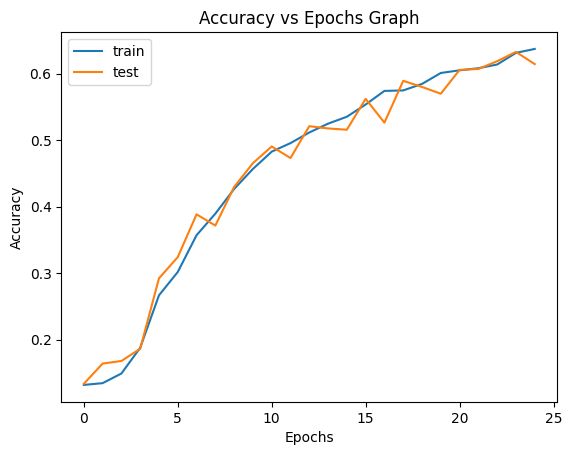

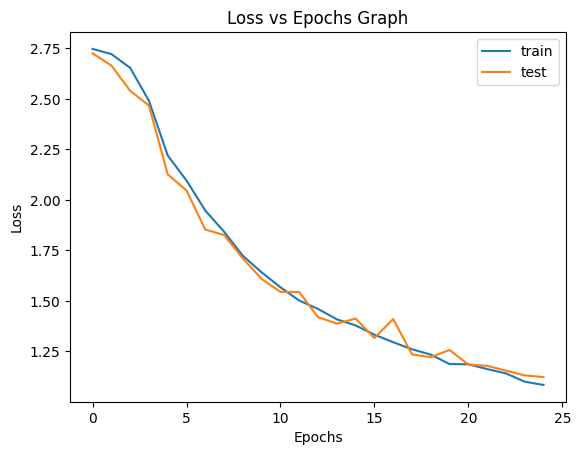

Accuracy	:	0.6141199226305609
Precision	:	0.6177780421921368
Recall	:	0.6141199226305609
F1 score	:	0.5990835813178025


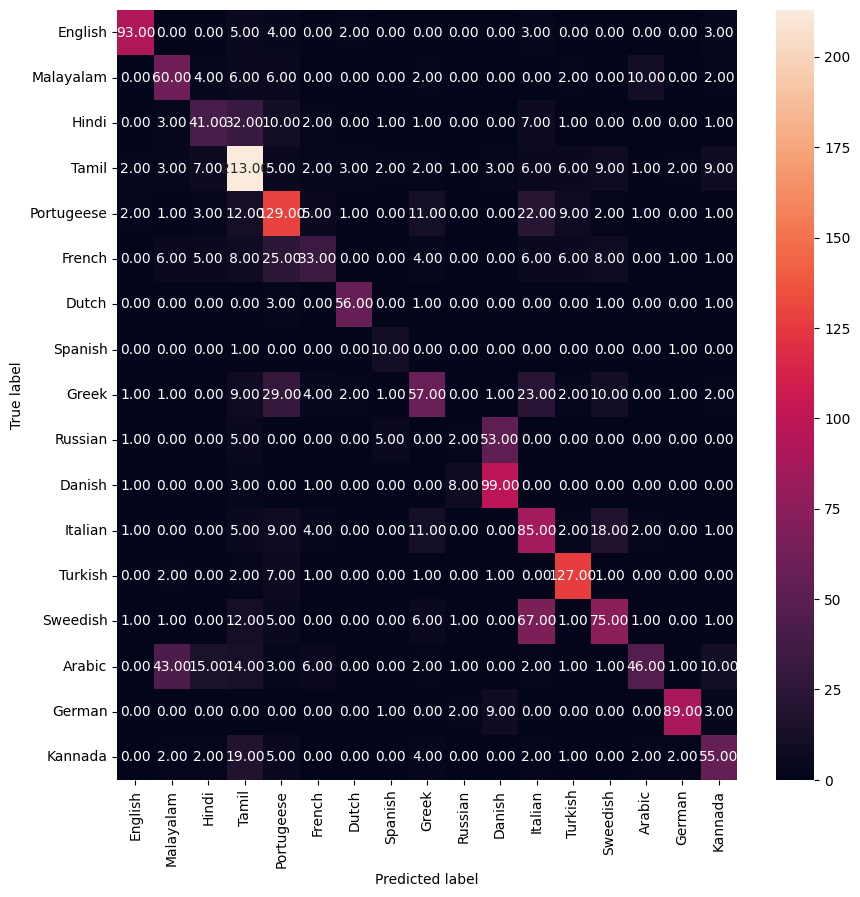

In [28]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=2, 
    layer_types=['LSTM', 'Dropout'],
    layer_units=[64, 0.2],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_LSTM2', X_train, X_test, y_train, y_test)

- Model : 3

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 384, 1)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 17)                561       
                                                                 
Total params: 19,537
Trainable params: 19,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 22:45:41.090705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:45:41.094356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:45:41.096375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 2.7561 - accuracy: 0.1266

2023-05-03 22:46:29.215286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 22:46:29.217492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 22:46:29.219286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 52s 188ms/step - loss: 2.7561 - accuracy: 0.1266 - val_loss: 2.7239 - val_accuracy: 0.1335
Epoch 2/25
259/259 [==============================] - 45s 172ms/step - loss: 2.7292 - accuracy: 0.1328 - val_loss: 2.7225 - val_accuracy: 0.1335
Epoch 3/25
259/259 [==============================] - 45s 173ms/step - loss: 2.7206 - accuracy: 0.1346 - val_loss: 2.6670 - val_accuracy: 0.1615
Epoch 4/25
259/259 [==============================] - 43s 166ms/step - loss: 2.7389 - accuracy: 0.1312 - val_loss: 2.7206 - val_accuracy: 0.1335
Epoch 5/25
259/259 [==============================] - 42s 164ms/step - loss: 2.7274 - accuracy: 0.1341 - val_loss: 2.7266 - val_accuracy: 0.1335
Epoch 6/25
259/259 [==============================] - 45s 173ms/step - loss: 2.7249 - accuracy: 0.1341 - val_loss: 2.7170 - val_accuracy: 0.1335
Epoch 7/25
259/259 [==============================] - 40s 153ms/step - loss: 2.7174 - accuracy: 0.1340 - val_loss: 2.6923 - val_accuracy: 0.1

2023-05-03 23:01:21.739225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:01:21.740859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:01:21.741927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 2s 29ms/step


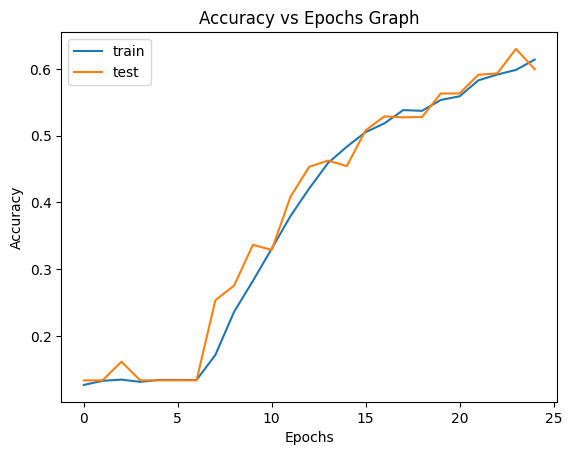

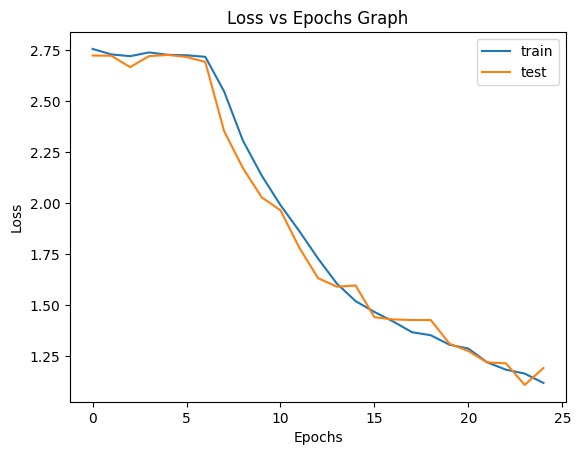

Accuracy	:	0.5996131528046421
Precision	:	0.5950943643193886
Recall	:	0.5996131528046421
F1 score	:	0.5868579881169489


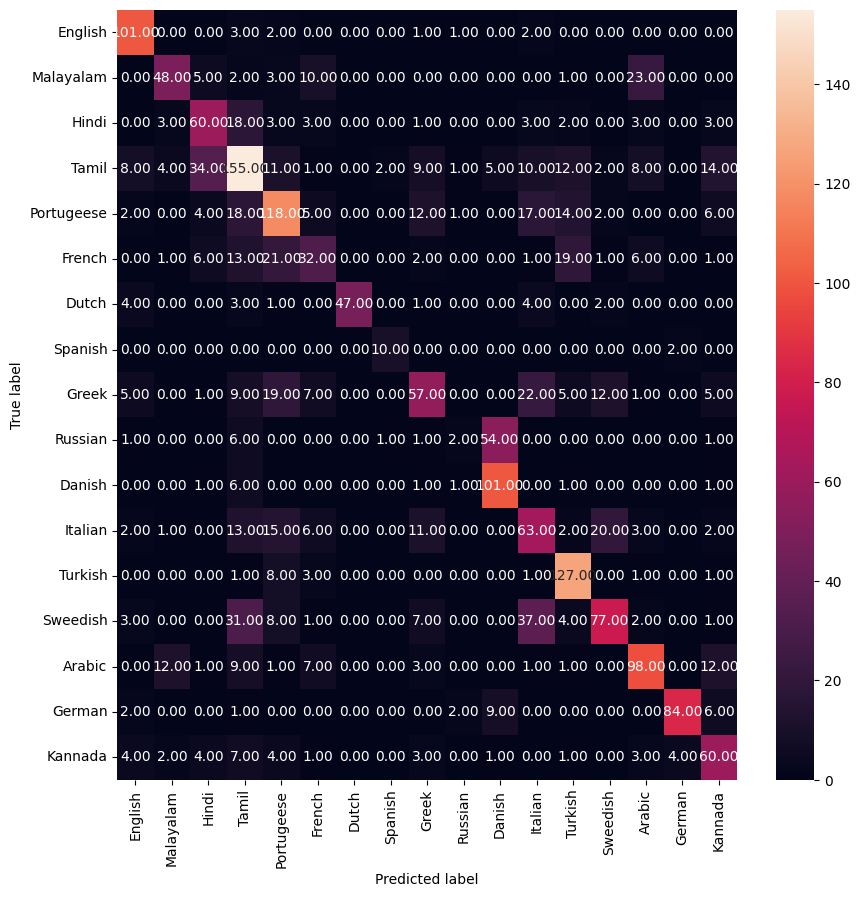

In [29]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=3, 
    layer_types=['LSTM', 'Dropout', 'Dense'],
    layer_units=[64, 0.2, 32],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_LSTM3', X_train, X_test, y_train, y_test)


- Model : 4

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 384, 1)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 17)                561       
                                                                 
Total params: 19,537
Trainable params: 19,537
Non-trai

2023-05-03 23:01:25.344916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:01:25.346565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:01:25.347646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 2.7661 - accuracy: 0.1312

2023-05-03 23:01:59.794325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:01:59.797029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:01:59.798891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 38s 141ms/step - loss: 2.7661 - accuracy: 0.1312 - val_loss: 2.7273 - val_accuracy: 0.1335
Epoch 2/25
259/259 [==============================] - 32s 122ms/step - loss: 2.7325 - accuracy: 0.1338 - val_loss: 2.7187 - val_accuracy: 0.1335
Epoch 3/25
259/259 [==============================] - 28s 110ms/step - loss: 2.6231 - accuracy: 0.1553 - val_loss: 2.5117 - val_accuracy: 0.1900
Epoch 4/25
259/259 [==============================] - 32s 123ms/step - loss: 2.3551 - accuracy: 0.2113 - val_loss: 2.4343 - val_accuracy: 0.2002
Epoch 5/25
259/259 [==============================] - 31s 120ms/step - loss: 2.1973 - accuracy: 0.2498 - val_loss: 2.1105 - val_accuracy: 0.2809
Epoch 6/25
259/259 [==============================] - 32s 122ms/step - loss: 2.0869 - accuracy: 0.2888 - val_loss: 1.9698 - val_accuracy: 0.3482
Epoch 7/25
259/259 [==============================] - 32s 124ms/step - loss: 2.0374 - accuracy: 0.3095 - val_loss: 1.9513 - val_accuracy: 0.3

2023-05-03 23:15:01.129246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:15:01.130833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:15:01.131985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 3s 36ms/step


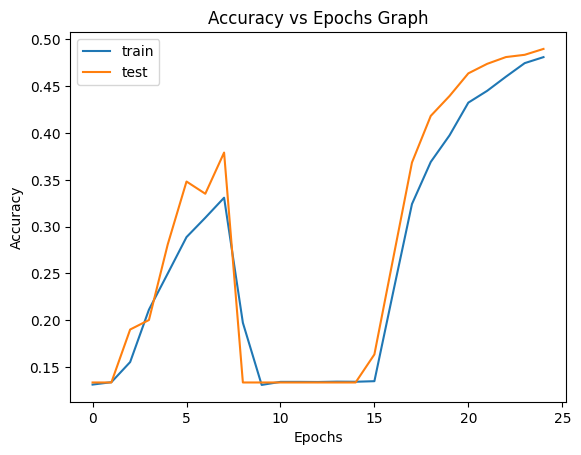

Accuracy	:	0.4898452611218569
Precision	:	0.4618992846214192
Recall	:	0.4898452611218569
F1 score	:	0.4550407906156676


In [30]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=4, 
    layer_types=['LSTM', 'Dropout', 'Dense', 'Dropout'],
    layer_units=[64, 0.2, 32, 0.2],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_LSTM4', X_train, X_test, y_train, y_test)

#### Convolutional Neural Network

- Model : 1

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 384, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 382, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 191, 64)          0         
 )                                                               
                                                                 
 dropout_8 (Dropout)         (None, 191, 64)           0         
                                                                 
 flatten (Flatten)           (None, 12224)             0         
                                                                 
 dense_17 (Dense)            (None, 17)                207825    
                                                      

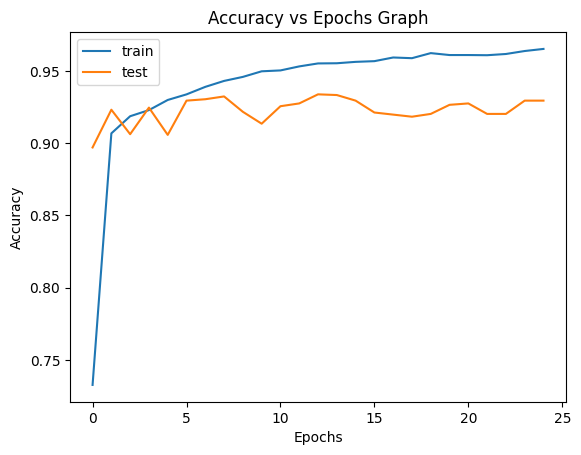

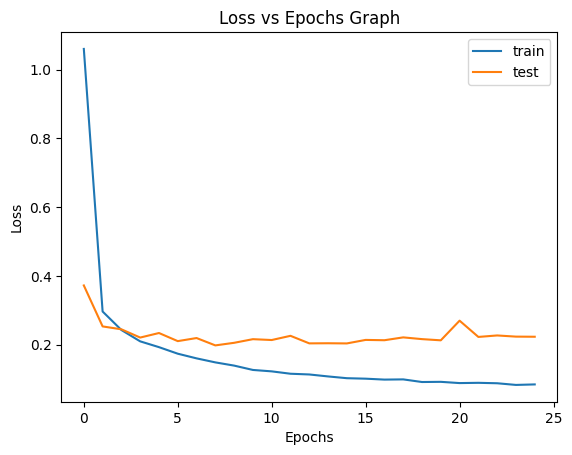

Accuracy	:	0.9294003868471954
Precision	:	0.9333091205717894
Recall	:	0.9294003868471954
F1 score	:	0.9253485146720823


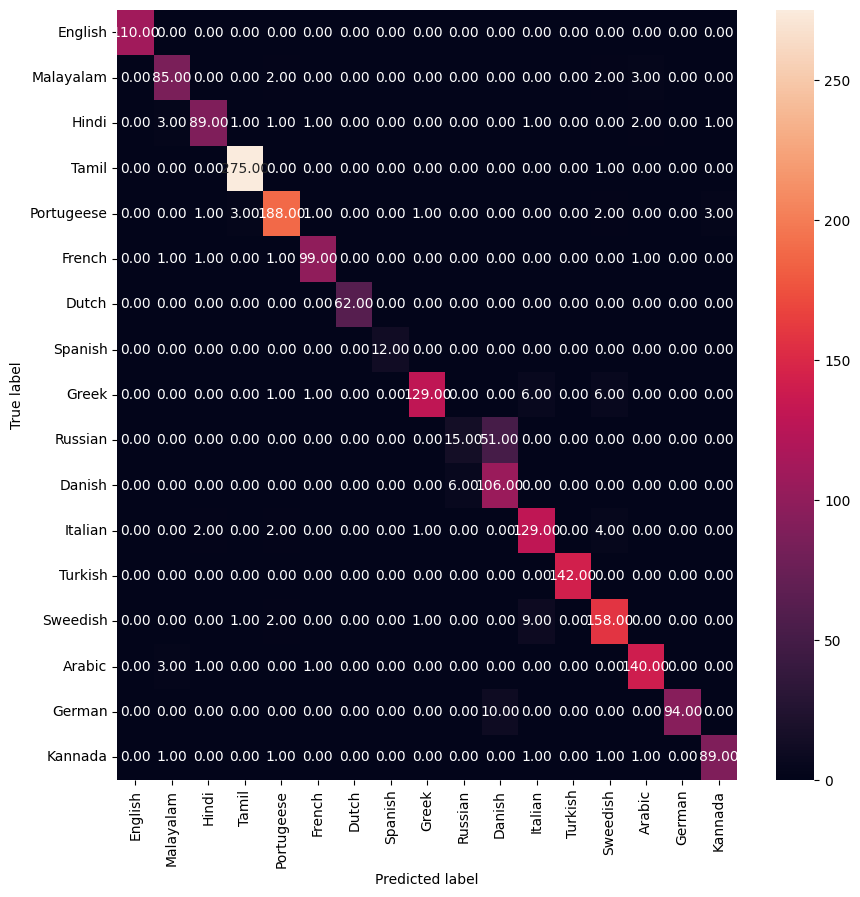

In [31]:
model = createModel(
    model_type = 'Convolutional1D', 
    num_layers=4, 
    layer_types=['Conv1D', 'MaxPooling1D', 'Dropout', 'Flatten'],
    layer_units=[64, 2, 0.2, 32],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_CNN1', X_train, X_test, y_train, y_test)

- Model : 2

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 384, 1)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 382, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 191, 64)          0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 191, 64)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 94, 64)           0         
 1D)                                                 

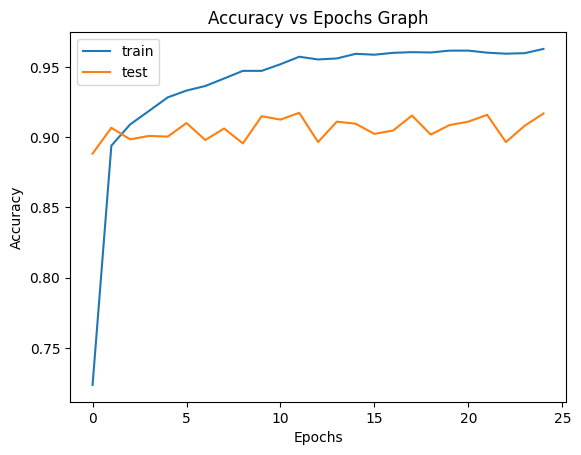

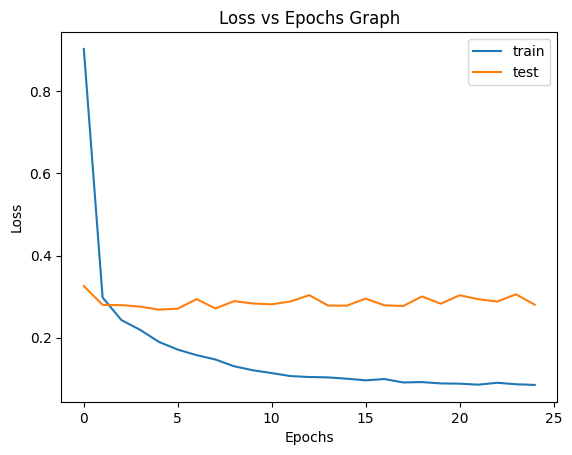

Accuracy	:	0.9168278529980658
Precision	:	0.9173190397678875
Recall	:	0.9168278529980658
F1 score	:	0.9147854111256045


In [32]:
model = createModel(
    model_type = 'Convolutional1D', 
    num_layers=6, 
    layer_types=['Conv1D', 'MaxPooling1D', 'Dropout', 'Conv1D', 'MaxPooling1D', 'Flatten'],
    layer_units=[64, 2, 0.2, 64, 2],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_CNN2', X_train, X_test, y_train, y_test)

- Model : 3

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 384, 1)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 382, 64)           256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 191, 64)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 191, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 12224)             0         
                                                                 
 dense_19 (Dense)            (None, 17)                207825    
                                                     

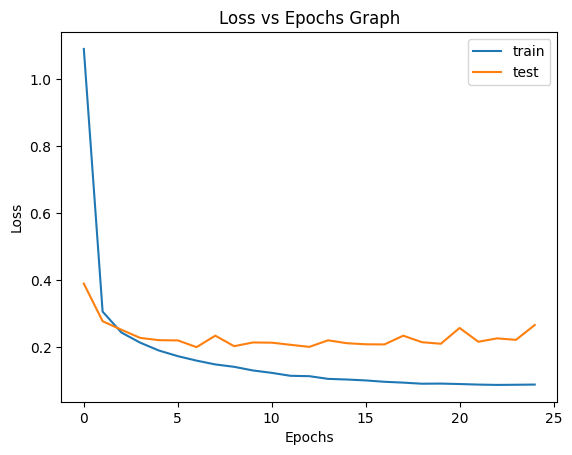

Accuracy	:	0.9279497098646035
Precision	:	0.941263405108279
Recall	:	0.9279497098646035
F1 score	:	0.9208153616611578


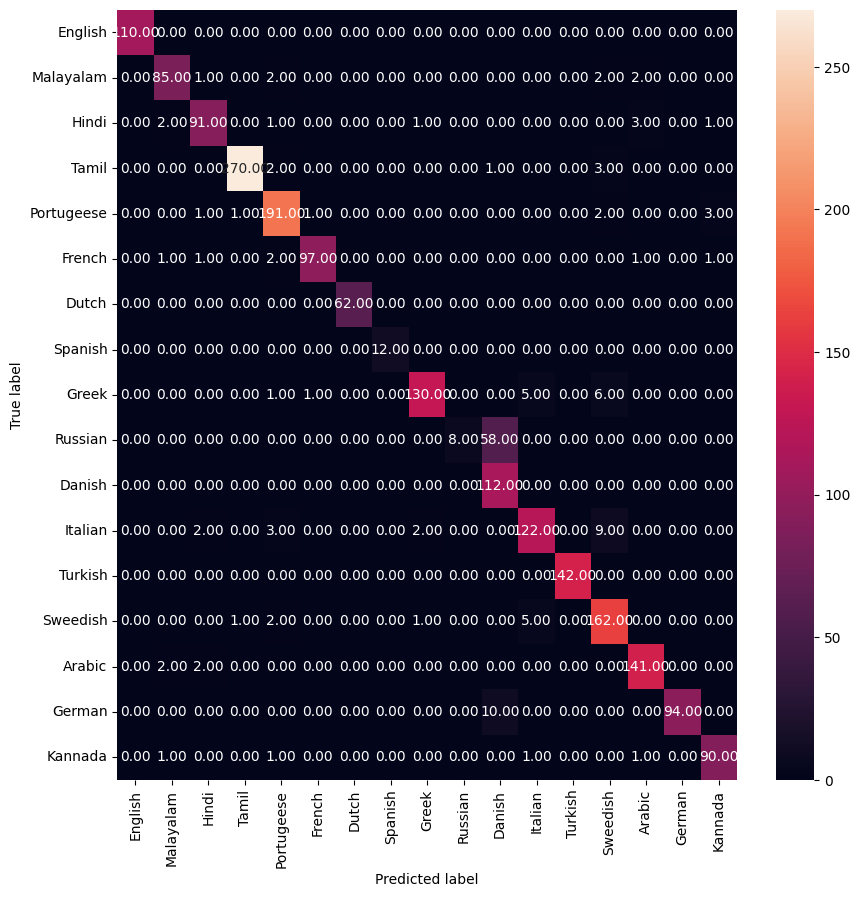

In [33]:
model = createModel(
    model_type = 'Convolutional2D', 
    num_layers=4, 
    layer_types=['Conv2D', 'MaxPooling2D', 'Dropout', 'Flatten'],
    layer_units=[64, 2, 0.2, 32],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_CNN3', X_train, X_test, y_train, y_test)

- Model : 4

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 384, 1)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 382, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 191, 64)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 191, 64)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 94, 64)           0         
 1D)                                                 

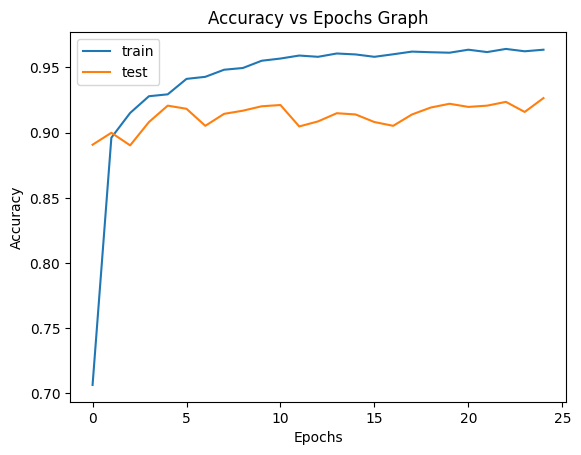

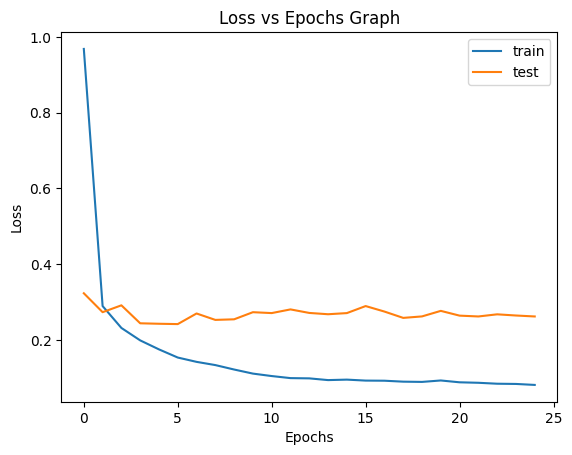

Accuracy	:	0.9264990328820116
Precision	:	0.9288837258147179
Recall	:	0.9264990328820116
F1 score	:	0.9243698136891914


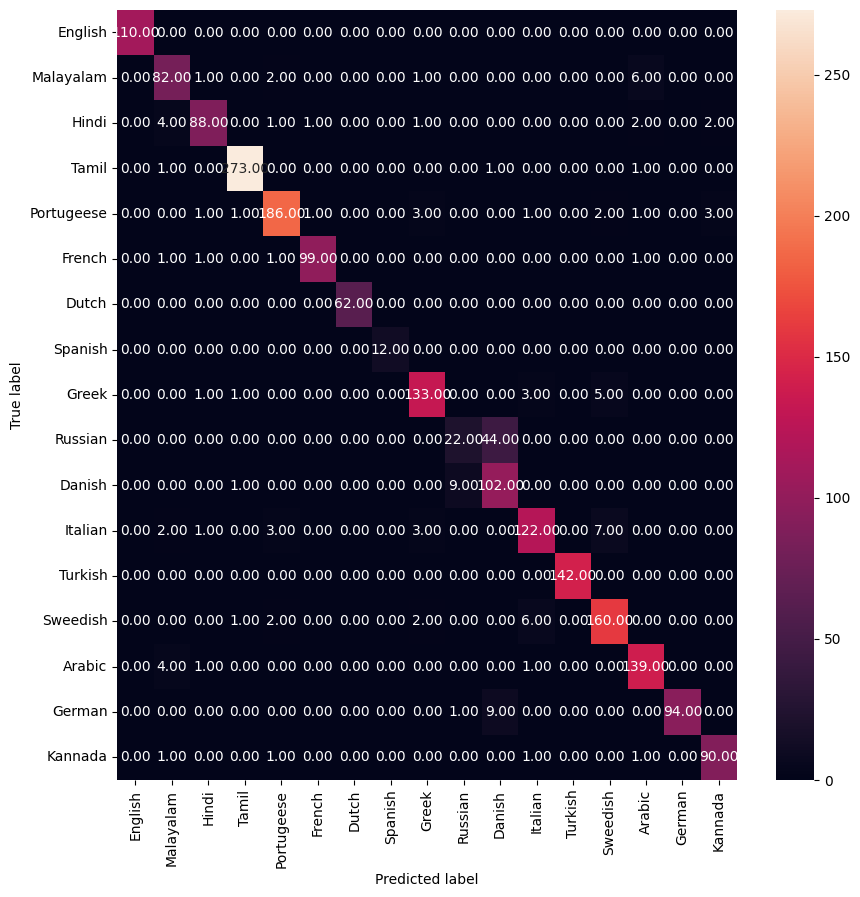

In [34]:
model = createModel(
    model_type = 'Convolutional2D', 
    num_layers=6, 
    layer_types=['Conv2D', 'MaxPooling2D', 'Dropout', 'Conv2D', 'MaxPooling2D', 'Flatten'],
    layer_units=[64, 2, 0.2, 64, 2],
    input_shape=(None, 384), 
)

TrainModel(model, 25, 'ST_CNN4', X_train, X_test, y_train, y_test)

### Using FastText

In [35]:
df = pd.read_csv('../data/Language.csv')
df['Text'] = clean(df['Text'])


df['Embedding'] = df['Text'].apply(ftEmbedding)

In [36]:
X_train, X_test, y_train, y_test = split_train_test_data(df['Embedding'], df['Language'])

#### Multi-Layer Perceptron

- Model: 1

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 17)                289       
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 1s 3ms/step - loss: 2.4102 - accuracy: 0.4813 - val_loss: 2.0065 - val_accuracy: 0.7374
Epoch 2/25
259/259 [==============================] - 1s 2ms/step - loss: 1.7262 - accuracy: 0.8486 - val_loss: 1.4457 - val_accuracy: 0.9526
Epoch 3/25
259/259 [==============================] - 1s 2ms/step - loss: 1.2642 - accuracy: 0.9680 - val_loss: 1.0633 - val_accuracy: 0.9831
Epoch 4/25
259/259 [==============================] - 1s 2ms/step - loss: 0.9445 - accuracy: 0.9781 - val_loss: 0.7987 - val_accuracy: 0.9869
Epoch 5/25
259/

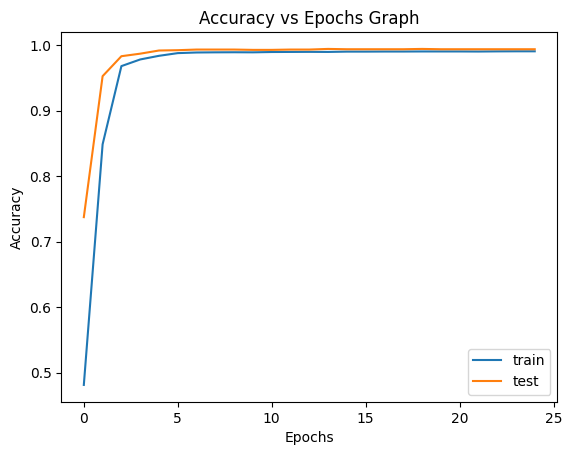

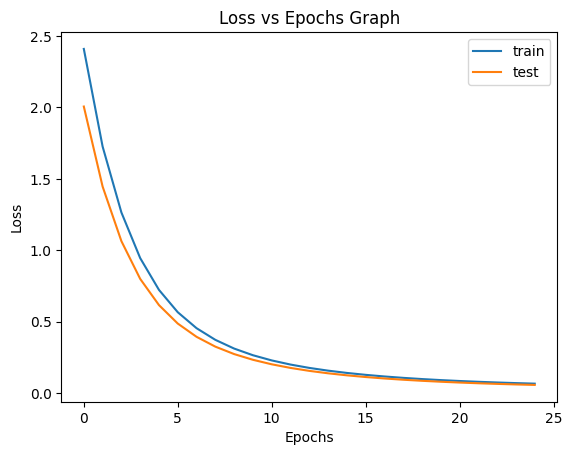

Accuracy	:	0.9937137330754352
Precision	:	0.9937679293447744
Recall	:	0.9937137330754352
F1 score	:	0.9936941801198613


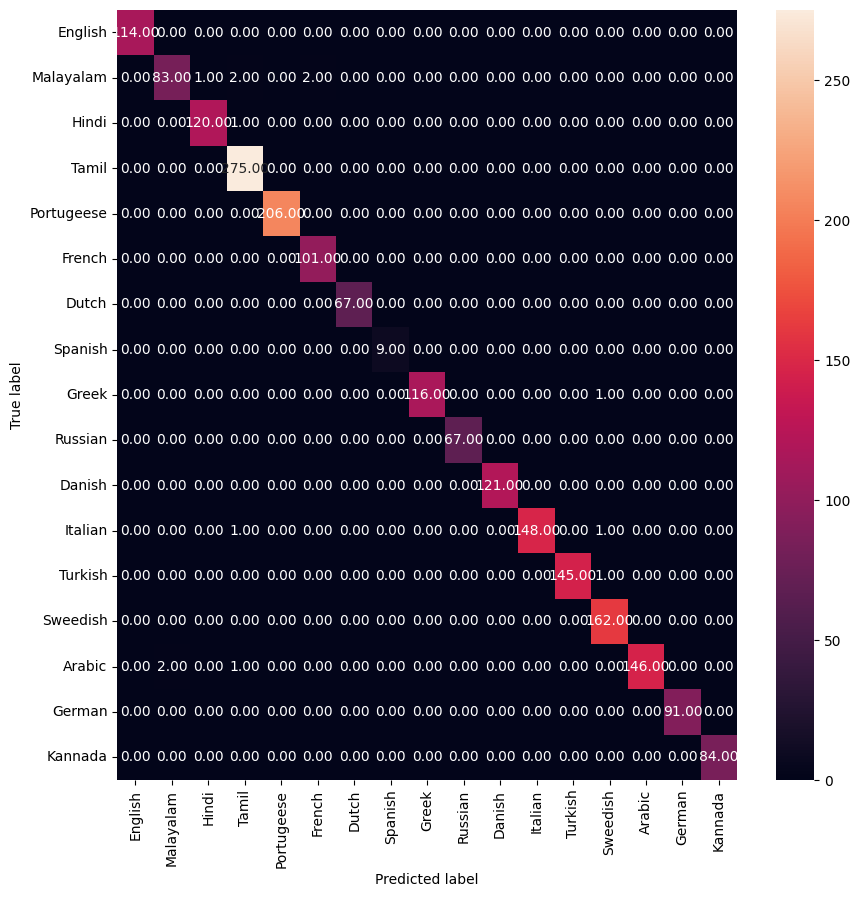

In [37]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=0, 
    layer_types=[], 
    layer_units=[], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_MLP1', X_train, X_test, y_train, y_test)

- Model : 2

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               2176      
                                                                 
 dense_23 (Dense)            (None, 17)                2193      
                                                                 
Total params: 4,369
Trainable params: 4,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 1s 3ms/step - loss: 1.0684 - accuracy: 0.9175 - val_loss: 0.1746 - val_accuracy: 0.9932
Epoch 2/25
259/259 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9902 - val_loss: 0.0588 - val_accuracy: 0.9932
Epoch 3/25
259/259 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9918 - val_loss: 0.0393 - val_accuracy: 0.9942
Epoch 4/25
259/259 [=

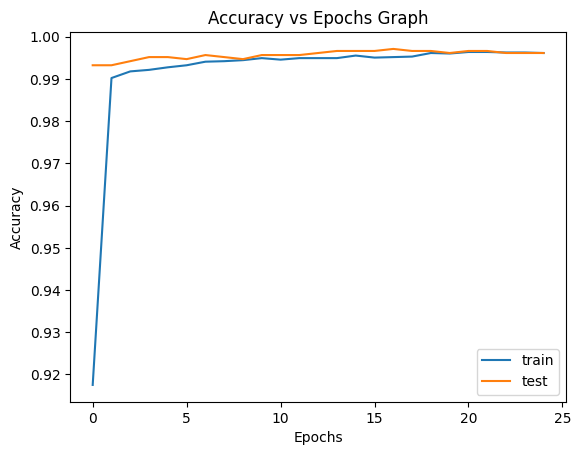

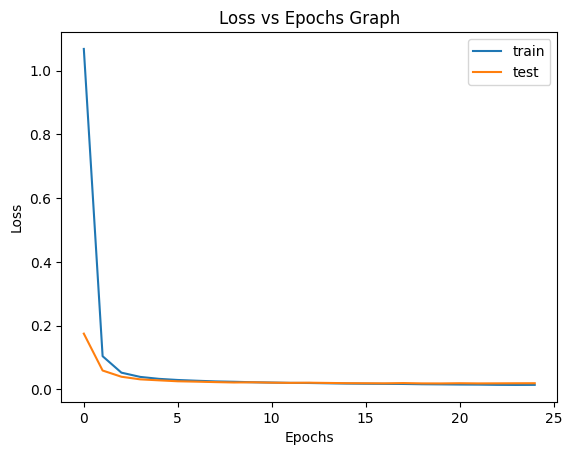

Accuracy	:	0.9961315280464217
Precision	:	0.9961639656509562
Recall	:	0.9961315280464217
F1 score	:	0.9961295949518882


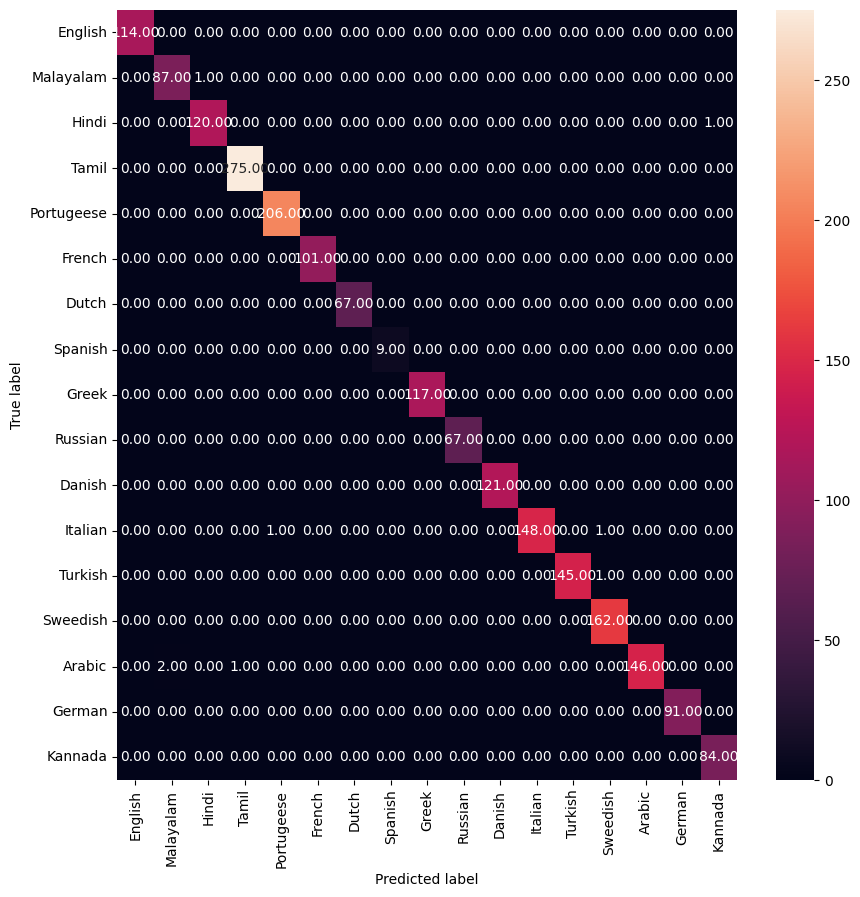

In [38]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=1, 
    layer_types=['Dense'], 
    layer_units=[128], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_MLP2', X_train, X_test, y_train, y_test)

- Model : 3

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2176      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 17)                2193      
                                                                 
Total params: 4,369
Trainable params: 4,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 2s 3ms/step - loss: 1.1498 - accuracy: 0.8914 - val_loss: 0.1924 - val_accuracy: 0.9932
Epoch 2/25
259/259 [==============================] - 1s 3ms/step - loss: 0.1257 - accuracy: 0.9892 - val_loss: 0.0604 - val_accuracy: 0.9947
Epoch 3/25
259/259 [===========

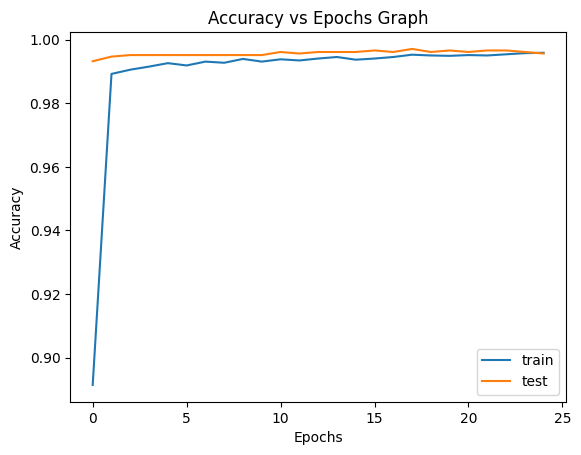

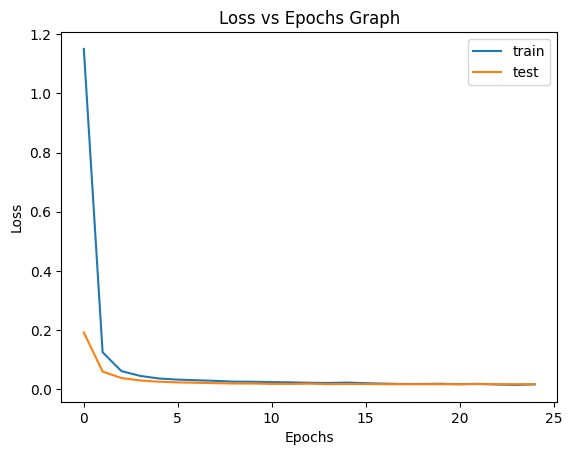

Accuracy	:	0.9956479690522244
Precision	:	0.9956747709385262
Recall	:	0.9956479690522244
F1 score	:	0.9956432512241891


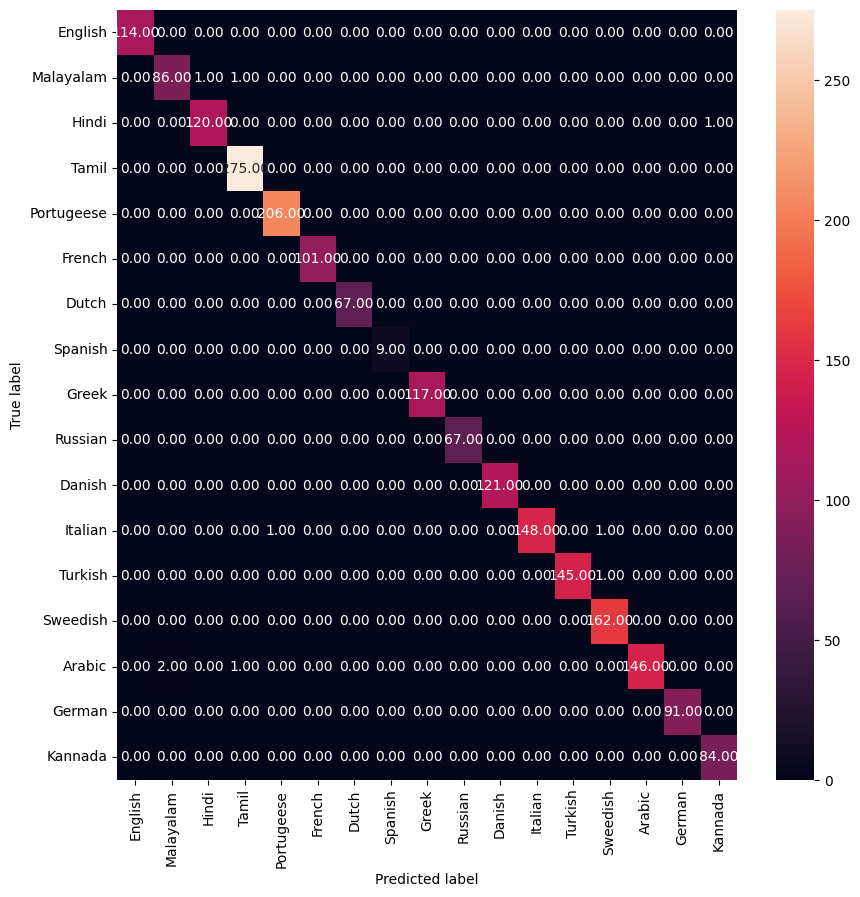

In [39]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=2, 
    layer_types=['Dense', 'Dropout'], 
    layer_units=[128, 0.2], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_MLP3', X_train, X_test, y_train, y_test)

- Model : 4

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               2176      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 17)                1105      
                                                                 
Total params: 11,537
Trainable params: 11,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [==============================] - 2s 3ms/step - loss: 0.7902 - accuracy: 0.9017 - val_loss: 0.0512 - val_accuracy: 0.9932
Epoch 2/25
259/259 [===================

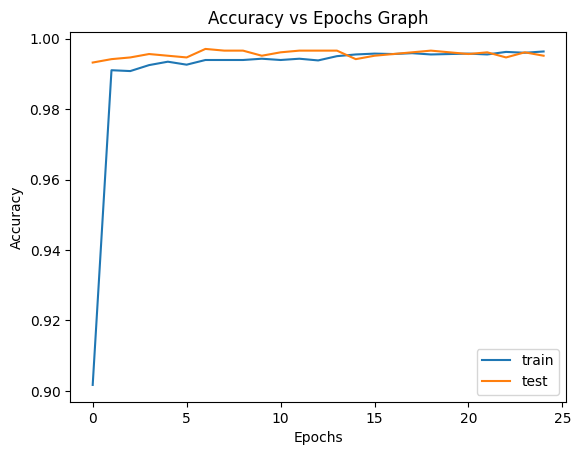

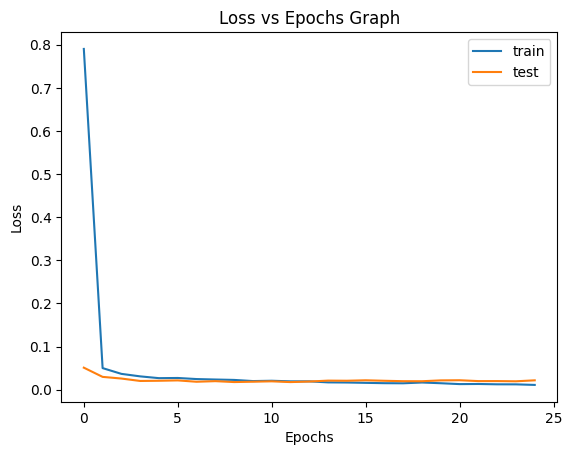

Accuracy	:	0.995164410058027
Precision	:	0.9952224952872528
Recall	:	0.995164410058027
F1 score	:	0.9951690317496733


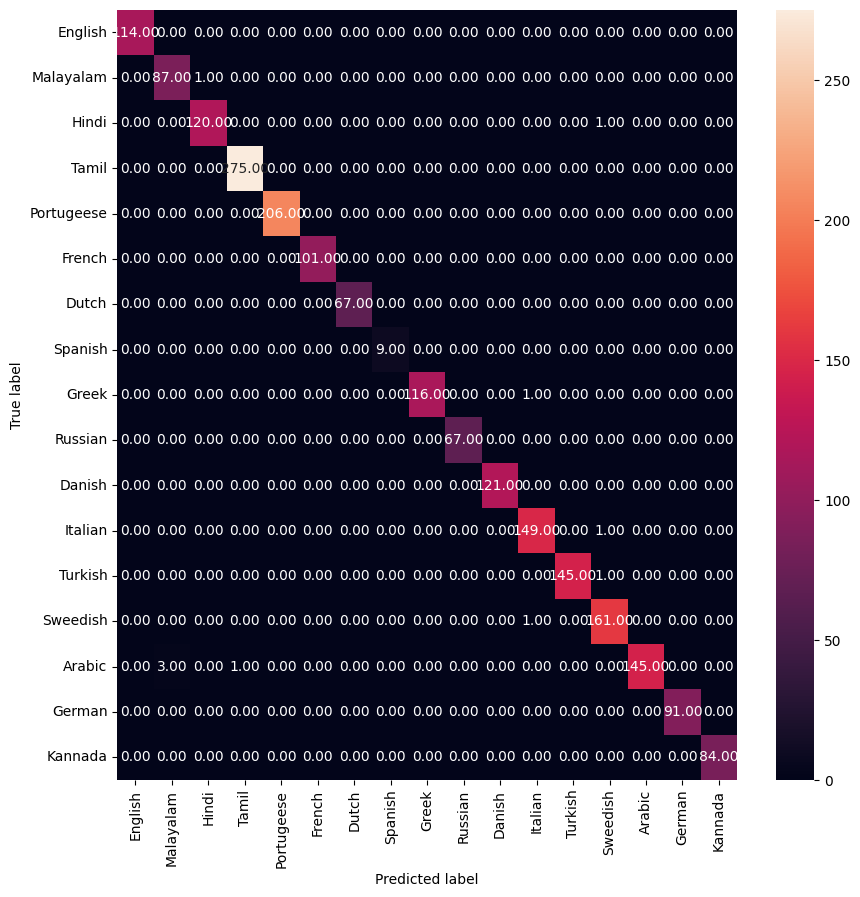

In [40]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=3, 
    layer_types=['Dense', 'Dropout', 'Dense'], 
    layer_units=[128, 0.2, 64], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_MLP4', X_train, X_test, y_train, y_test)

- Model : 5

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               2176      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 17)                1105      
                                                                 
Total params: 11,537
Trainable params: 11,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
259/259 [=============================

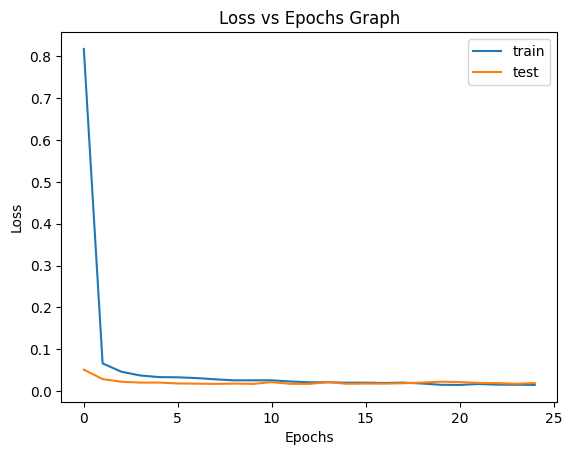

Accuracy	:	0.995164410058027
Precision	:	0.9951706479468425
Recall	:	0.995164410058027
F1 score	:	0.995144199958617


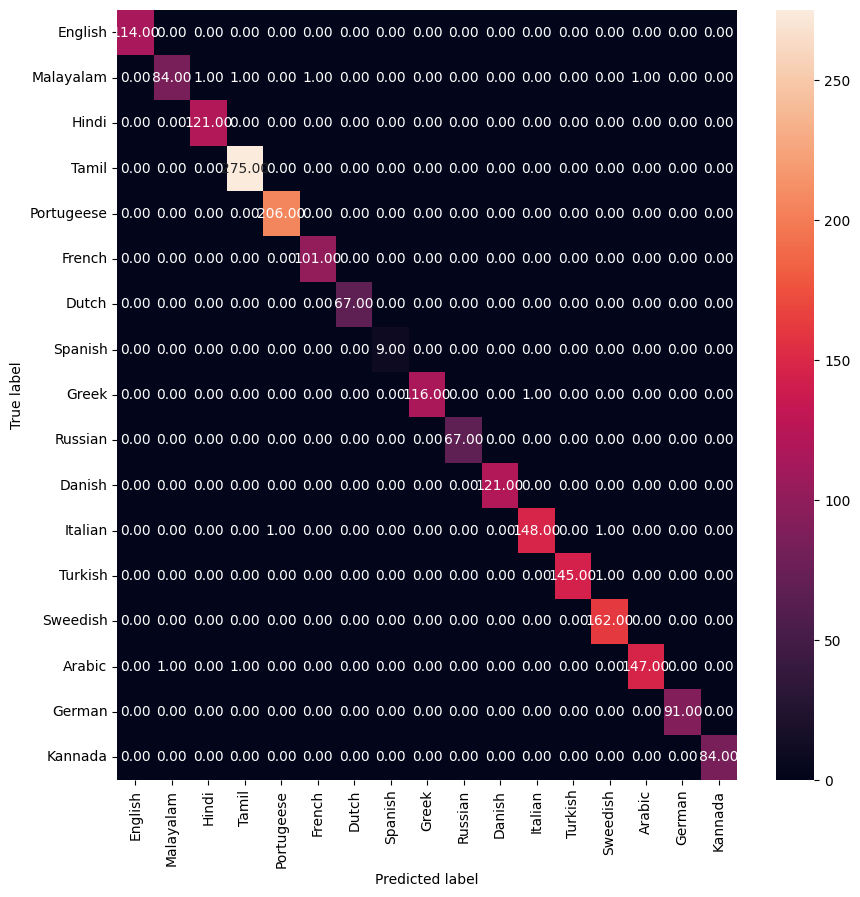

In [41]:
model = createModel(
    model_type = 'Sequentials', 
    num_layers=4, 
    layer_types=['Dense', 'Dropout', 'Dense', 'Dropout'], 
    layer_units=[128, 0.2, 64, 0.2], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_MLP5', X_train, X_test, y_train, y_test)

#### Long Short Term Memory

- Model : 1

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 16, 1)             0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_32 (Dense)            (None, 17)                1105      
                                                                 
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 23:22:37.751269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:22:37.754246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:22:37.756647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 1.5712 - accuracy: 0.5234

2023-05-03 23:22:43.957209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:22:43.960009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:22:43.962012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 7s 14ms/step - loss: 1.5712 - accuracy: 0.5234 - val_loss: 0.8214 - val_accuracy: 0.7534
Epoch 2/25
259/259 [==============================] - 3s 12ms/step - loss: 0.6982 - accuracy: 0.8009 - val_loss: 0.5811 - val_accuracy: 0.8177
Epoch 3/25
259/259 [==============================] - 3s 11ms/step - loss: 0.5099 - accuracy: 0.8509 - val_loss: 0.4353 - val_accuracy: 0.8646
Epoch 4/25
259/259 [==============================] - 3s 11ms/step - loss: 0.4169 - accuracy: 0.8740 - val_loss: 0.4180 - val_accuracy: 0.8612
Epoch 5/25
259/259 [==============================] - 3s 10ms/step - loss: 0.3418 - accuracy: 0.8929 - val_loss: 0.2843 - val_accuracy: 0.9207
Epoch 6/25
259/259 [==============================] - 3s 10ms/step - loss: 0.2648 - accuracy: 0.9241 - val_loss: 0.2406 - val_accuracy: 0.9328
Epoch 7/25
259/259 [==============================] - 2s 9ms/step - loss: 0.2094 - accuracy: 0.9383 - val_loss: 0.1950 - val_accuracy: 0.9454
Epoch 8/25


2023-05-03 23:23:49.437708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:23:49.440631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:23:49.442595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 1s 4ms/step


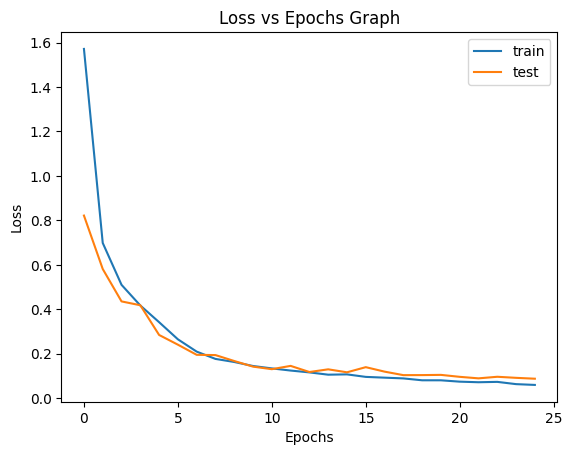

Accuracy	:	0.9743713733075435
Precision	:	0.9743375962470896
Recall	:	0.9743713733075435
F1 score	:	0.9740231140257486


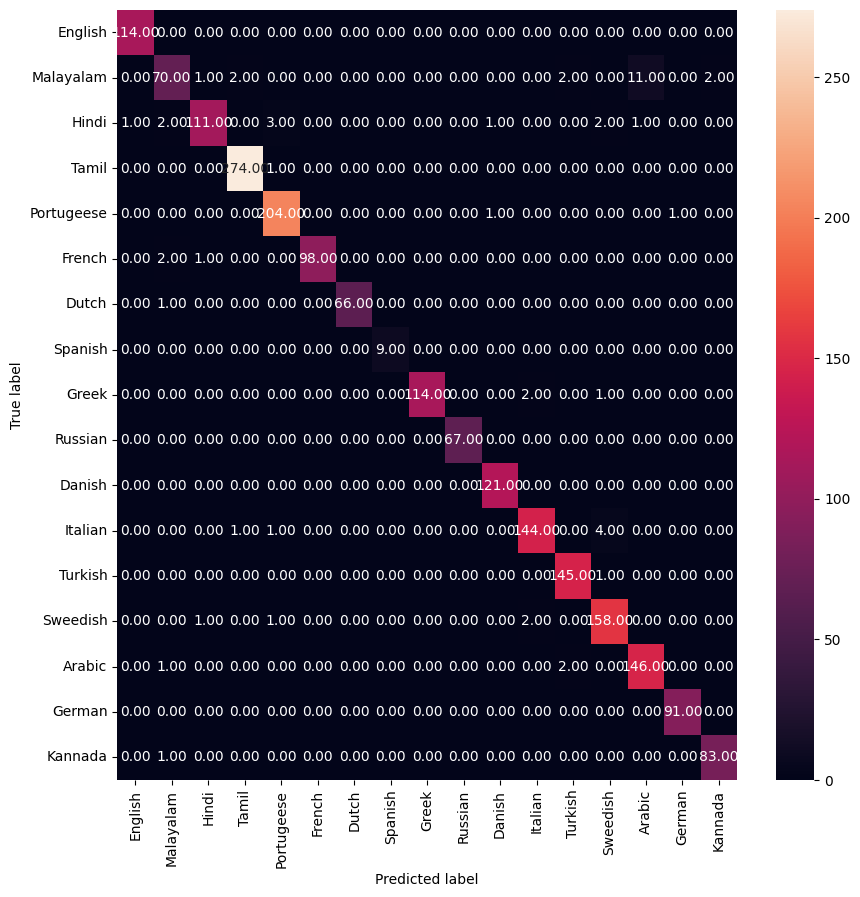

In [42]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=1, 
    layer_types=['LSTM'], 
    layer_units=[64], 
    input_shape=(None, 16), 
)

TrainModel(model, 25, 'FT_LSTM1', X_train, X_test, y_train, y_test)

- Model : 2

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 16, 1)             0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 17)                1105      
                                                                 
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 23:23:51.819529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:23:51.821581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:23:51.823375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/259 [============================>.] - ETA: 0s - loss: 1.5733 - accuracy: 0.5106

2023-05-03 23:23:56.674725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:23:56.676853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:23:56.678149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 5s 12ms/step - loss: 1.5626 - accuracy: 0.5140 - val_loss: 0.7399 - val_accuracy: 0.8201
Epoch 2/25
259/259 [==============================] - 3s 11ms/step - loss: 0.6463 - accuracy: 0.8139 - val_loss: 0.4769 - val_accuracy: 0.8588
Epoch 3/25
259/259 [==============================] - 3s 12ms/step - loss: 0.4595 - accuracy: 0.8650 - val_loss: 0.3595 - val_accuracy: 0.8965
Epoch 4/25
259/259 [==============================] - 3s 11ms/step - loss: 0.3484 - accuracy: 0.9000 - val_loss: 0.2757 - val_accuracy: 0.9139
Epoch 5/25
259/259 [==============================] - 3s 12ms/step - loss: 0.2772 - accuracy: 0.9239 - val_loss: 0.2962 - val_accuracy: 0.9125
Epoch 6/25
259/259 [==============================] - 3s 11ms/step - loss: 0.2247 - accuracy: 0.9397 - val_loss: 0.1943 - val_accuracy: 0.9444
Epoch 7/25
259/259 [==============================] - 3s 11ms/step - loss: 0.2019 - accuracy: 0.9455 - val_loss: 0.1974 - val_accuracy: 0.9449
Epoch 8/25

2023-05-03 23:25:01.213795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:25:01.217375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:25:01.219695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 1s 5ms/step


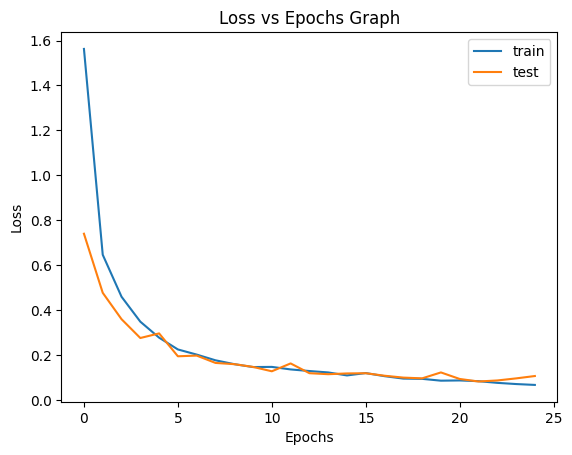

Accuracy	:	0.9661508704061895
Precision	:	0.9669700161942442
Recall	:	0.9661508704061895
F1 score	:	0.9660096801722312


In [43]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=2, 
    layer_types=['LSTM', 'Dropout'],
    layer_units=[64, 0.2],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_LSTM2', X_train, X_test, y_train, y_test)

- Model : 3

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_10 (Reshape)        (None, 16, 1)             0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 17)                561       
                                                                 
Total params: 19,537
Trainable params: 19,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


2023-05-03 23:25:03.893112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:25:03.894951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:25:03.896384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

255/259 [============================>.] - ETA: 0s - loss: 1.5913 - accuracy: 0.5027

2023-05-03 23:25:10.005057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:25:10.007746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:25:10.009937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 6s 12ms/step - loss: 1.5798 - accuracy: 0.5072 - val_loss: 0.6573 - val_accuracy: 0.8172
Epoch 2/25
259/259 [==============================] - 3s 11ms/step - loss: 0.6147 - accuracy: 0.8242 - val_loss: 0.4444 - val_accuracy: 0.8665
Epoch 3/25
259/259 [==============================] - 3s 11ms/step - loss: 0.3962 - accuracy: 0.8895 - val_loss: 0.2774 - val_accuracy: 0.9178
Epoch 4/25
259/259 [==============================] - 3s 12ms/step - loss: 0.3206 - accuracy: 0.9085 - val_loss: 0.2415 - val_accuracy: 0.9313
Epoch 5/25
259/259 [==============================] - 3s 10ms/step - loss: 0.2691 - accuracy: 0.9268 - val_loss: 0.1919 - val_accuracy: 0.9458
Epoch 6/25
259/259 [==============================] - 3s 10ms/step - loss: 0.2256 - accuracy: 0.9359 - val_loss: 0.2139 - val_accuracy: 0.9362
Epoch 7/25
259/259 [==============================] - 3s 13ms/step - loss: 0.2051 - accuracy: 0.9413 - val_loss: 0.1677 - val_accuracy: 0.9502
Epoch 8/25

2023-05-03 23:26:21.186271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:26:21.188279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:26:21.189736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 1s 5ms/step


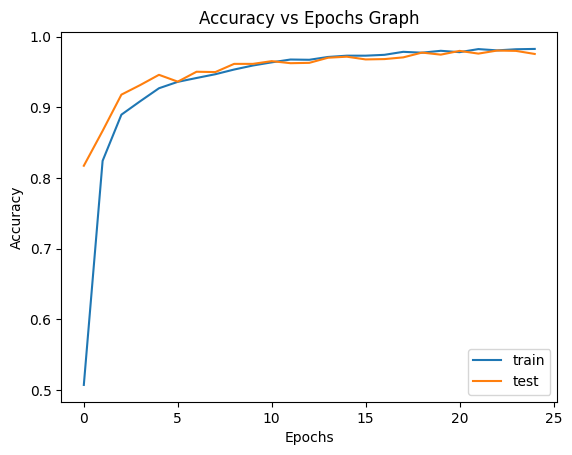

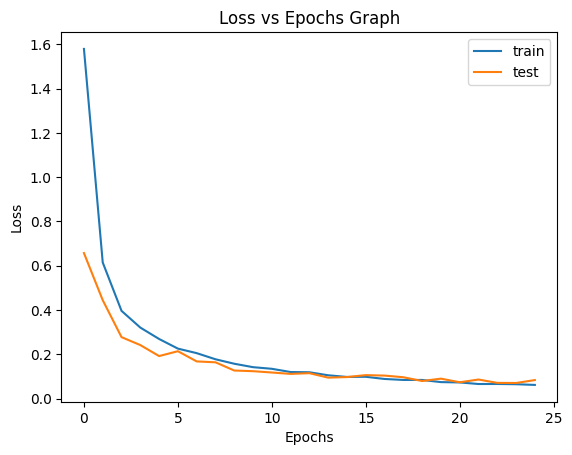

Accuracy	:	0.9753384912959381
Precision	:	0.976164736920124
Recall	:	0.9753384912959381
F1 score	:	0.9754230958267508


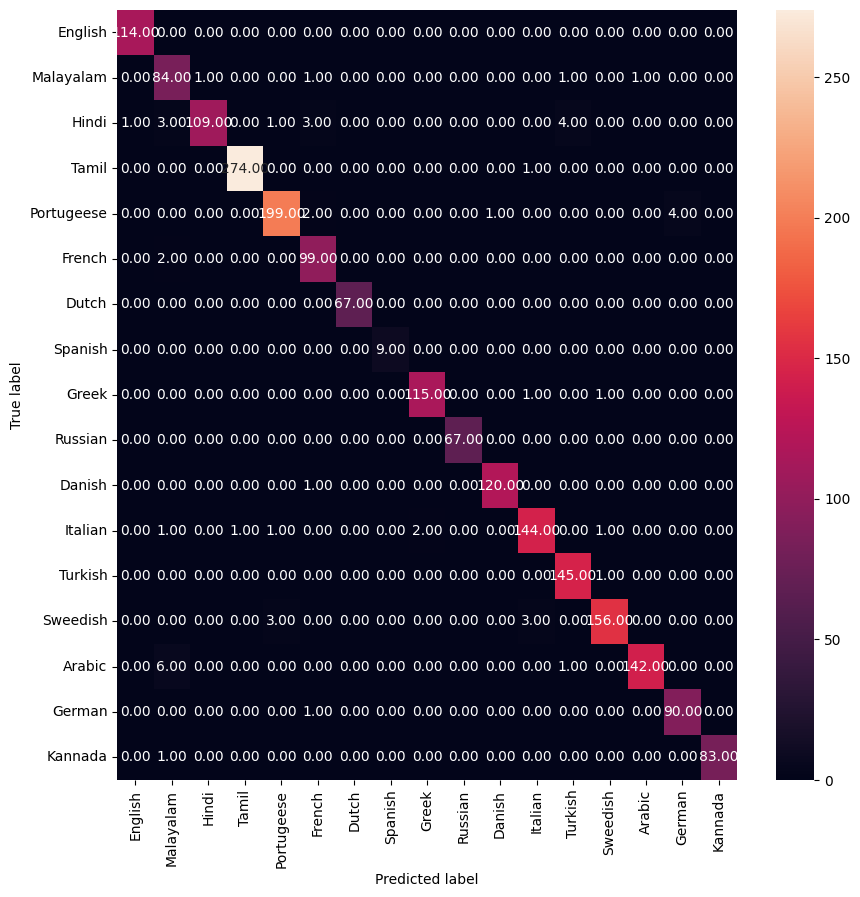

In [44]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=3, 
    layer_types=['LSTM', 'Dropout', 'Dense'],
    layer_units=[64, 0.2, 32],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_LSTM3', X_train, X_test, y_train, y_test)

- Model : 4

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 16, 1)             0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 17)                561       
                                                                 
Total params: 19,537
Trainable params: 19,537
Non-tra

2023-05-03 23:26:23.706923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:26:23.709755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:26:23.712301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/259 [============================>.] - ETA: 0s - loss: 1.7481 - accuracy: 0.4269

2023-05-03 23:26:29.249598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:26:29.251544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:26:29.252942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 6s 13ms/step - loss: 1.7343 - accuracy: 0.4319 - val_loss: 0.8549 - val_accuracy: 0.7848
Epoch 2/25
259/259 [==============================] - 3s 11ms/step - loss: 0.8444 - accuracy: 0.7333 - val_loss: 0.4911 - val_accuracy: 0.8564
Epoch 3/25
259/259 [==============================] - 3s 11ms/step - loss: 0.5700 - accuracy: 0.8378 - val_loss: 0.3713 - val_accuracy: 0.8946
Epoch 4/25
259/259 [==============================] - 3s 13ms/step - loss: 0.4135 - accuracy: 0.8855 - val_loss: 0.2602 - val_accuracy: 0.9260
Epoch 5/25
259/259 [==============================] - 3s 12ms/step - loss: 0.3390 - accuracy: 0.9138 - val_loss: 0.2135 - val_accuracy: 0.9405
Epoch 6/25
259/259 [==============================] - 3s 13ms/step - loss: 0.2774 - accuracy: 0.9272 - val_loss: 0.1769 - val_accuracy: 0.9492
Epoch 7/25
259/259 [==============================] - 3s 10ms/step - loss: 0.2393 - accuracy: 0.9360 - val_loss: 0.1770 - val_accuracy: 0.9463
Epoch 8/25

2023-05-03 23:27:37.702243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 23:27:37.704032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 23:27:37.705508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 1s 4ms/step


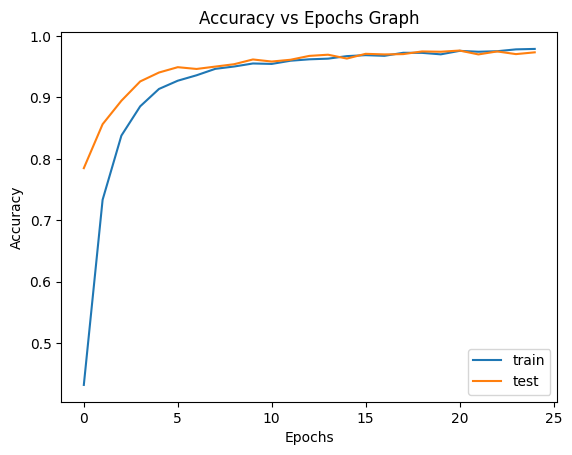

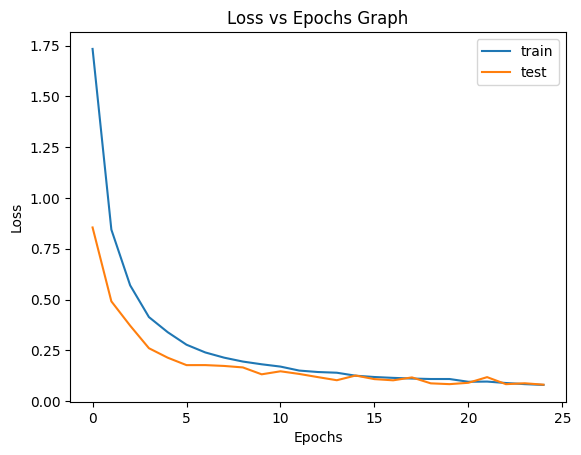

Accuracy	:	0.973404255319149
Precision	:	0.9732995988139005
Recall	:	0.973404255319149
F1 score	:	0.973205400671111


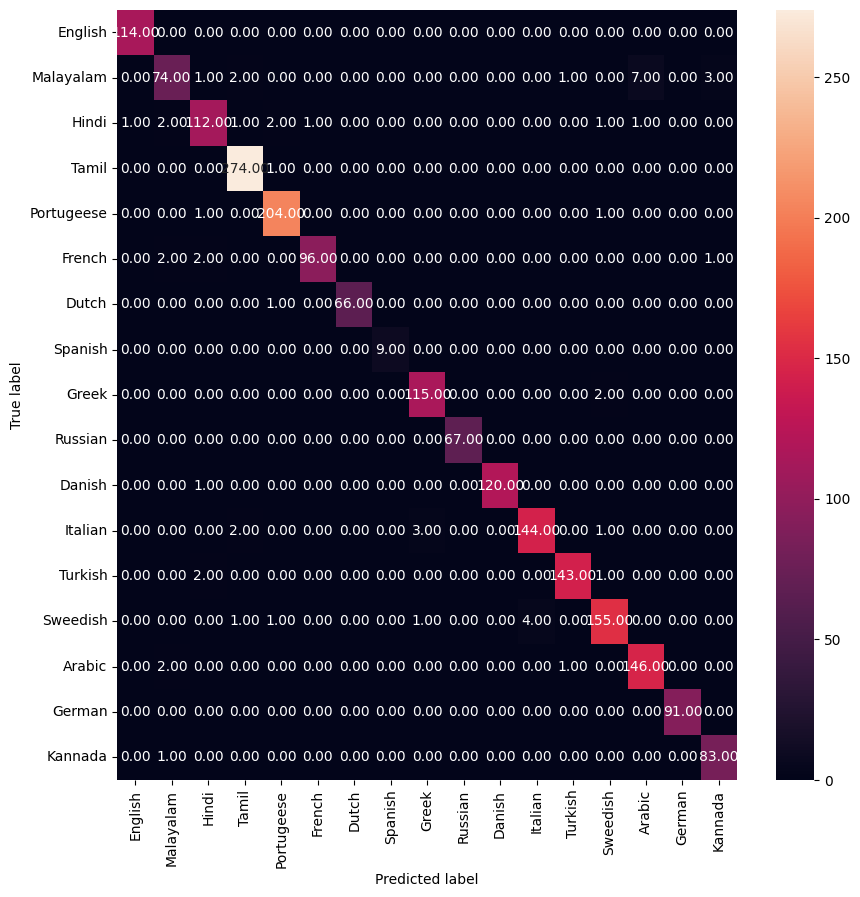

In [45]:
model = createModel(
    model_type = 'LSTM', 
    num_layers=4, 
    layer_types=['LSTM', 'Dropout', 'Dense', 'Dropout'],
    layer_units=[64, 0.2, 32, 0.2],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_LSTM4', X_train, X_test, y_train, y_test)

#### Convolutional Nural Network

- Model : 1

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_12 (Reshape)        (None, 16, 1)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 14, 64)            256       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 dropout_20 (Dropout)        (None, 7, 64)             0         
                                                                 
 flatten_4 (Flatten)         (None, 448)               0         
                                                                 
 dense_38 (Dense)            (None, 17)                7633      
                                                     

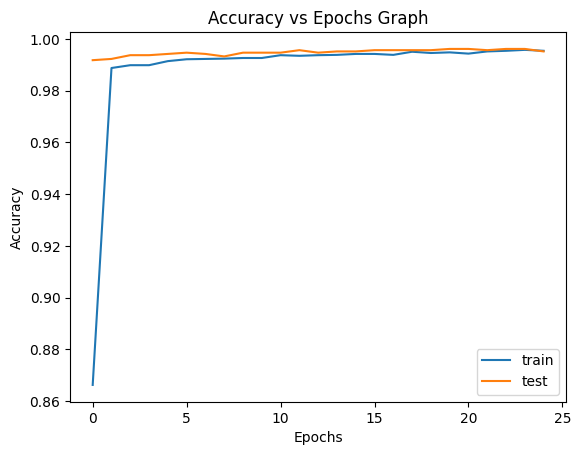

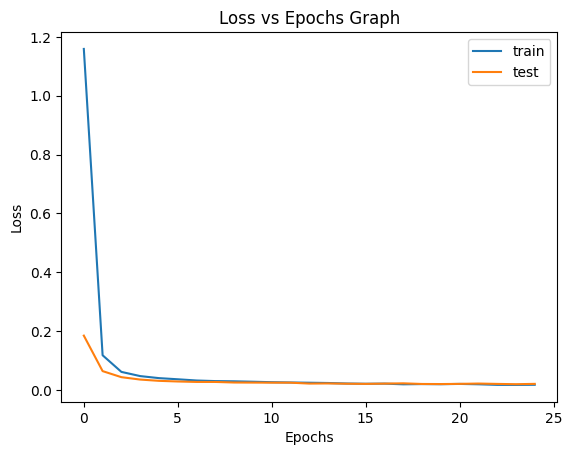

Accuracy	:	0.995164410058027
Precision	:	0.9951963694743706
Recall	:	0.995164410058027
F1 score	:	0.9951616090528747


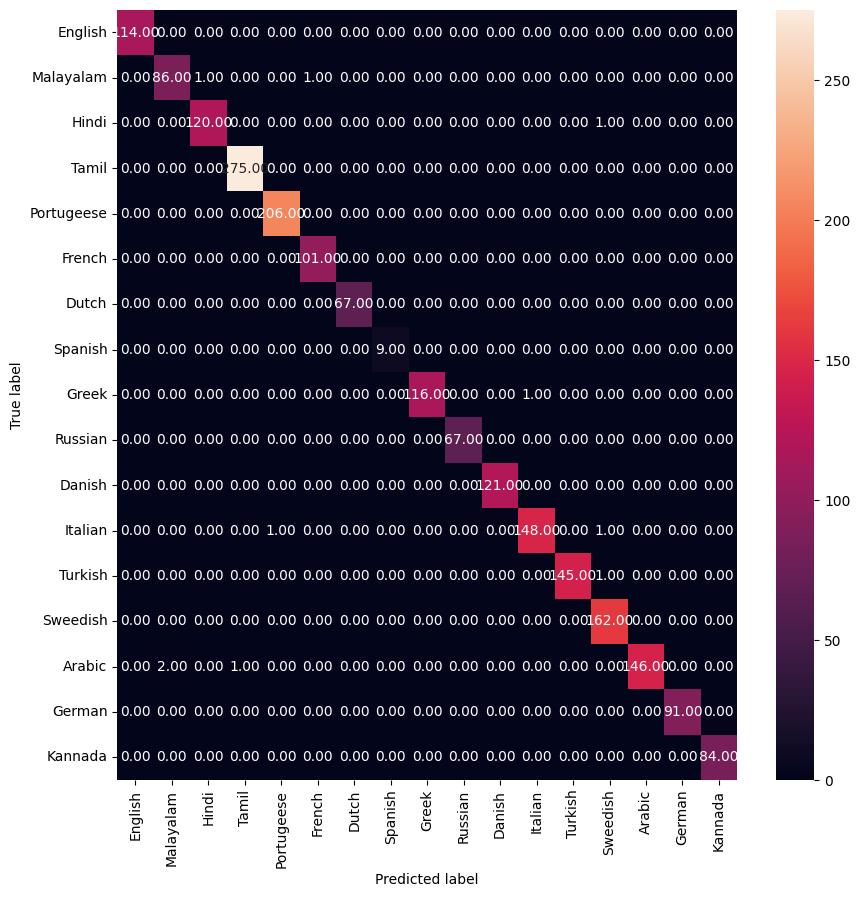

In [46]:
model = createModel(
    model_type = 'Convolutional1D', 
    num_layers=4, 
    layer_types=['Conv1D', 'MaxPooling1D', 'Dropout', 'Flatten'],
    layer_units=[64, 2, 0.2, 32],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_CNN1', X_train, X_test, y_train, y_test)

- Model : 2

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_13 (Reshape)        (None, 16, 1)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 14, 64)            256       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 dropout_21 (Dropout)        (None, 7, 64)             0         
                                                                 
 conv1d_8 (Conv1D)           (None, 5, 64)             12352     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 2, 64)            0         
 1D)                                                 

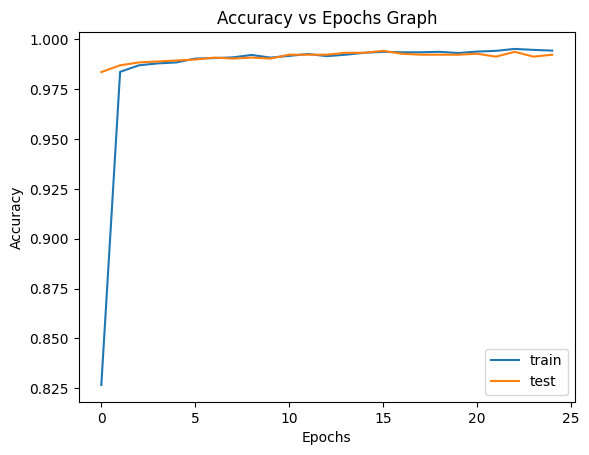

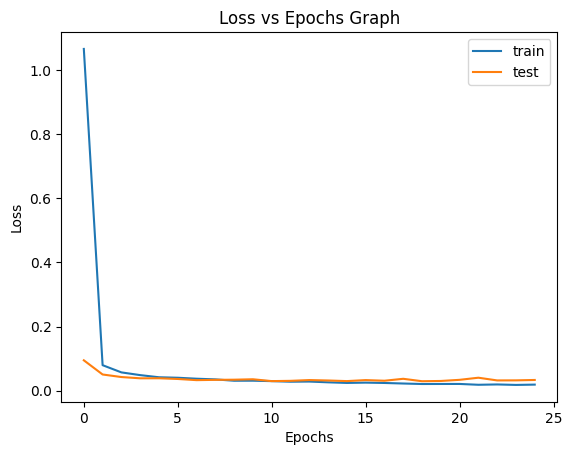

Accuracy	:	0.9922630560928434
Precision	:	0.9923051315558264
Recall	:	0.9922630560928434
F1 score	:	0.9922525004021822


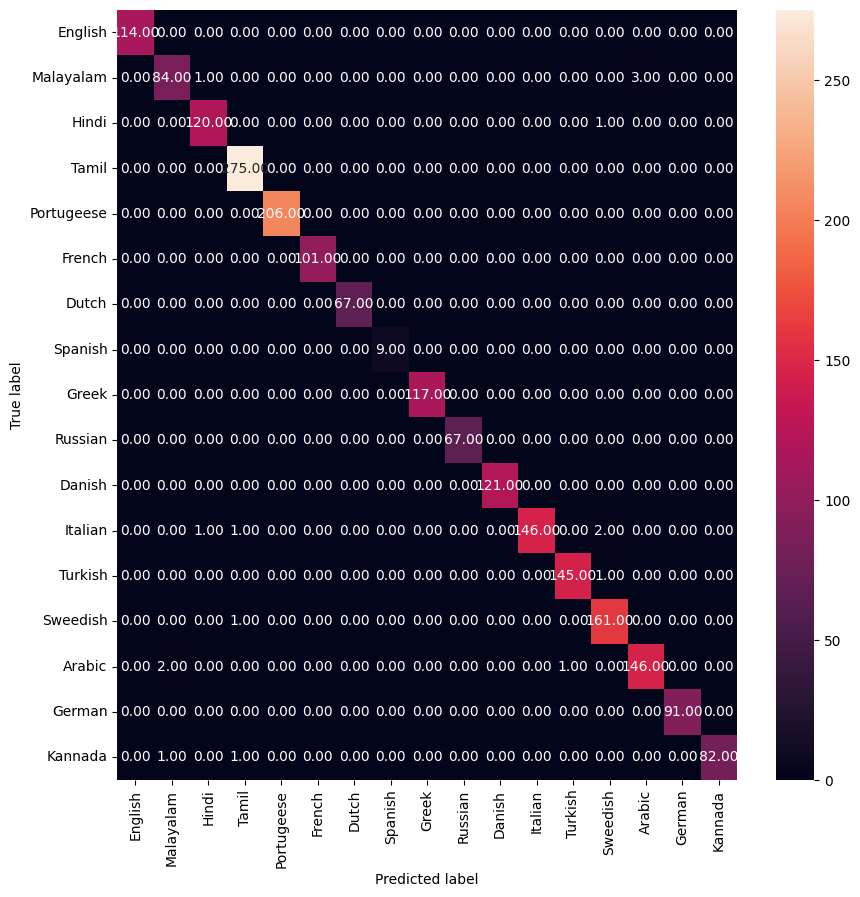

In [47]:
model = createModel(
    model_type = 'Convolutional1D', 
    num_layers=6, 
    layer_types=['Conv1D', 'MaxPooling1D', 'Dropout', 'Conv1D', 'MaxPooling1D', 'Flatten'],
    layer_units=[64, 2, 0.2, 64, 2],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_CNN2', X_train, X_test, y_train, y_test)

- Model : 3

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 16, 1)             0         
                                                                 
 conv1d_9 (Conv1D)           (None, 14, 64)            256       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 dropout_22 (Dropout)        (None, 7, 64)             0         
                                                                 
 conv1d_10 (Conv1D)          (None, 5, 64)             12352     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                

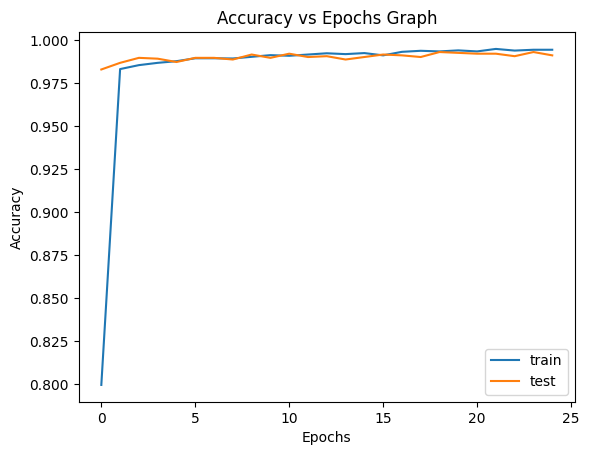

Accuracy	:	0.9912959381044487
Precision	:	0.991546054533526
Recall	:	0.9912959381044487
F1 score	:	0.9913260034598861


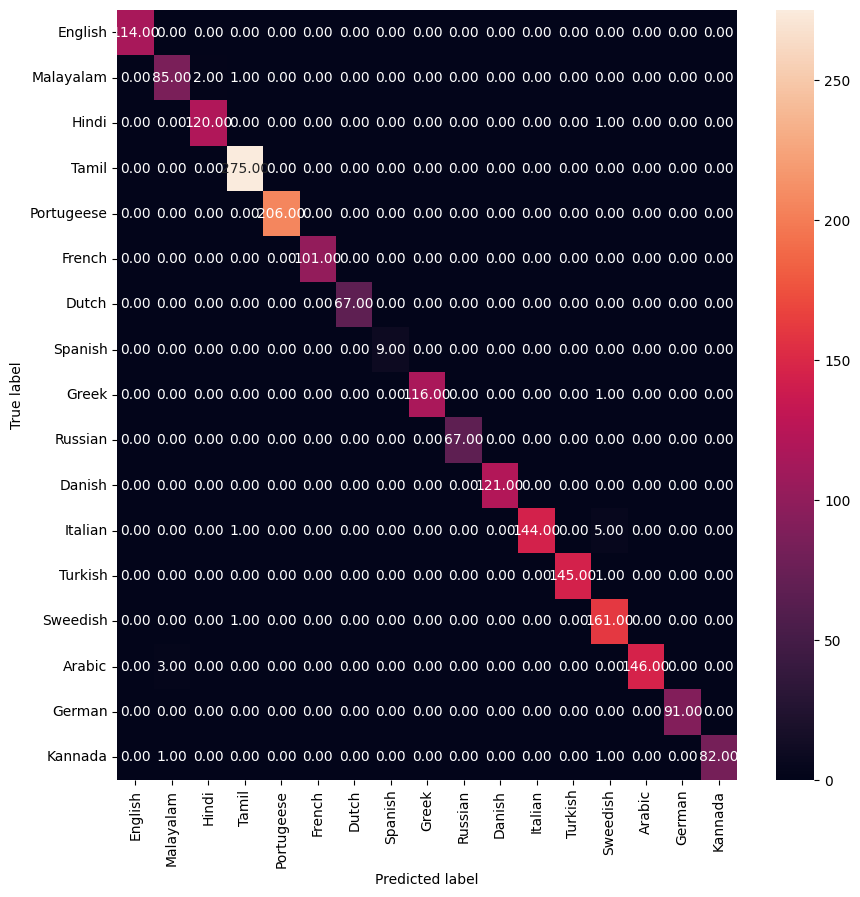

In [48]:
model = createModel(
    model_type = 'Convolutional2D', 
    num_layers=6, 
    layer_types=['Conv2D', 'MaxPooling2D', 'Dropout', 'Conv2D', 'MaxPooling2D', 'Flatten'],
    layer_units=[64, 2, 0.2, 64, 2],
    input_shape=(None, 16), 
)
TrainModel(model, 25, 'FT_CNN3', X_train, X_test, y_train, y_test)